In [1]:
#import libraries that are required
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import itertools
from mlxtend.classifier import StackingClassifier
import seaborn as sns
from IPython.display import display
import warnings
my_pal2 = {'0': "g", "1": "b"}

In [2]:
#import the csv file
mwd = pd.read_csv("Measure While Drilling Practice Data For Project.csv")

In [3]:
#view first 5 rows
mwd.head()

HOLE_ID  Drill_ID      Start_Time        End_Time  End_Depth (m)    RPM  \
0     EA1        M1  1/03/2019 1:37  1/03/2019 1:37            0.1  143.9   
1     EA1        M1  1/03/2019 1:37  1/03/2019 1:37            0.2  143.3   
2     EA1        M1  1/03/2019 1:37  1/03/2019 1:37            0.3  143.7   
3     EA1        M1  1/03/2019 1:37  1/03/2019 1:37            0.4  144.0   
4     EA1        M1  1/03/2019 1:38  1/03/2019 1:37            0.5  143.3   

    WOB (kN)   Torque (kN-m)  ROP (m/s)   Blast Index          ROCK ID  
0     106.31             2.5     0.0094          38.5                4  
1     106.55             2.6     0.0686           6.9                1  
2     110.85             3.4     0.0655           5.6                1  
3     112.90             3.6     0.0717           8.4  2 - Of interest  
4     113.54             3.6     0.0617          10.3  2 - Of interest

<p style="font-family: Arial; font-size:1.4em;color:green;"> Exploratory Data Analysis  </p>

In [4]:
mwd.describe()

End_Depth (m)           RPM       WOB (kN)   Torque (kN-m)  \
count  326436.000000  326436.00000  326436.000000   326436.000000   
mean        8.914477     135.29693     196.329831        6.186543   
std         5.816388      12.57348      30.419771        0.937472   
min         0.100000       0.00000       0.000000        0.000000   
25%         4.200000     126.20000     186.080000        5.800000   
50%         8.400000     138.90000     201.780000        6.200000   
75%        13.100000     143.10000     217.090000        6.700000   
max        43.250000     242.40000     314.150000       11.800000   

           ROP (m/s)    Blast Index  
count  326436.000000  326436.000000  
mean        0.036975      31.252781  
std         0.026229      19.829483  
min         0.000000       0.000000  
25%         0.024600      20.600000  
50%         0.032000      28.400000  
75%         0.042900      37.800000  
max         0.477600    1714.400000

326,436 rows for each Feature. Blast Index max is quite high. Min for most is zero, checked with business this is correct. WOB has the largest std deviation of 30. ROP has the smallest range

In [5]:
mwd.shape

(326436, 11)

In [6]:
mwd.columns

Index(['HOLE_ID', ' Drill_ID', ' Start_Time', 'End_Time', 'End_Depth (m)',
       'RPM', ' WOB (kN)', ' Torque (kN-m)', 'ROP (m/s)', ' Blast Index',
       ' ROCK ID'],
      dtype='object')

In [7]:
#Change column names to make them easier to work with
mwd=mwd.rename(columns= {'End_Depth (m)' : 'End_Depth_(m)' , ' WOB (kN)' : 'WOB_(kN)' , ' Torque (kN-m)' : 'Torque_(kN-m)', 'ROP (m/s)' : 'ROP_(m/s)' , ' Blast Index' : 'Blast_Index', ' Drill_ID' : 'Drill_ID',' Start_Time' : 'Start_Time',' ROCK ID' : 'Rock_ID'})

In [8]:
#check column names now look ok
mwd.columns

Index(['HOLE_ID', 'Drill_ID', 'Start_Time', 'End_Time', 'End_Depth_(m)', 'RPM',
       'WOB_(kN)', 'Torque_(kN-m)', 'ROP_(m/s)', 'Blast_Index', 'Rock_ID'],
      dtype='object')

In [9]:
#check for any null values
mwd.isnull().sum()

HOLE_ID          0
Drill_ID         0
Start_Time       0
End_Time         0
End_Depth_(m)    0
RPM              0
WOB_(kN)         0
Torque_(kN-m)    0
ROP_(m/s)        0
Blast_Index      0
Rock_ID          0
dtype: int64

No null values so no need to drop anything or investigate further

In [10]:
mwd.value_counts()

HOLE_ID  Drill_ID  Start_Time        End_Time          End_Depth_(m)  RPM    WOB_(kN)  Torque_(kN-m)  ROP_(m/s)  Blast_Index  Rock_ID
RZ17     M3        5/04/2019 13:35   5/04/2019 13:35   0.20           40.0   117.30    2.8            0.0310     0.0          1          2
RI22     M3        3/04/2019 0:46    3/04/2019 0:46    0.20           144.2  109.88    2.7            0.0209     0.0          1          2
RK19     M3        2/04/2019 20:46   2/04/2019 20:46   0.60           138.1  113.30    3.3            0.0210     0.0          1          2
QC7      M4        7/04/2019 0:41    7/04/2019 0:41    5.50           125.4  152.72    4.9            0.0526     0.0          1          2
EQ25     M3        25/02/2019 11:31  25/02/2019 11:31  0.20           143.4  155.09    3.9            0.0877     0.0          1          2
                                                                                                                                        ..
EZ18     M2        25/02/2019 16

In [11]:
mwd['HOLE_ID'].value_counts()

Y15    498
Y6     497
Y11    497
Y10    496
Y14    496
      ... 
RP8     65
RN7     65
RO9     64
RQ8     64
RO7     64
Name: HOLE_ID, Length: 1952, dtype: int64

1,952 drilling events

In [12]:
mwd['Start_Time']

0           1/03/2019 1:37
1           1/03/2019 1:37
2           1/03/2019 1:37
3           1/03/2019 1:37
4           1/03/2019 1:38
                ...       
326431    26/03/2019 15:58
326432    26/03/2019 15:58
326433    26/03/2019 15:58
326434    26/03/2019 15:58
326435    26/03/2019 15:58
Name: Start_Time, Length: 326436, dtype: object

data all relates to March

<p style="font-family: Arial; font-size:1.4em;color:green;"> Feature Selection  </p>

C:\Users\LeahPettigrew\AppData\Local\Temp\ipykernel_2332\2510125598.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mwd.corr().round(2), square=True, linewidths=0.1, cmap="PiYG", vmin=1, vmax=-1, annot=True)


Text(0.5, 1.0, 'Heatmap of the Correlation of all Features of the Measure While Drilling dataset')

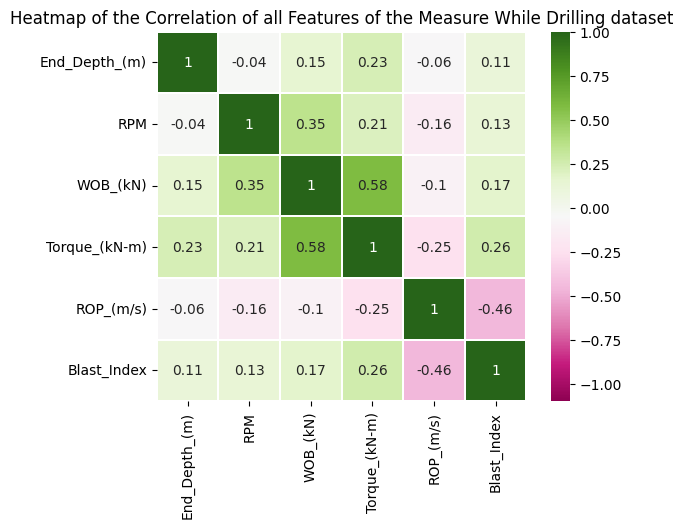

In [13]:
sns.heatmap(mwd.corr().round(2), square=True, linewidths=0.1, cmap="PiYG", vmin=1, vmax=-1, annot=True)
plt.title("Heatmap of the Correlation of all Features of the Measure While Drilling dataset")

The most highly correlated Feautures are WOB_(kN) and Torque_(KN-m) but these are only 0.58 so at this point I will keep all of the features

array([[<Axes: title={'center': 'End_Depth_(m)'}>,
        <Axes: title={'center': 'RPM'}>],
       [<Axes: title={'center': 'WOB_(kN)'}>,
        <Axes: title={'center': 'Torque_(kN-m)'}>],
       [<Axes: title={'center': 'ROP_(m/s)'}>,
        <Axes: title={'center': 'Blast_Index'}>]], dtype=object)

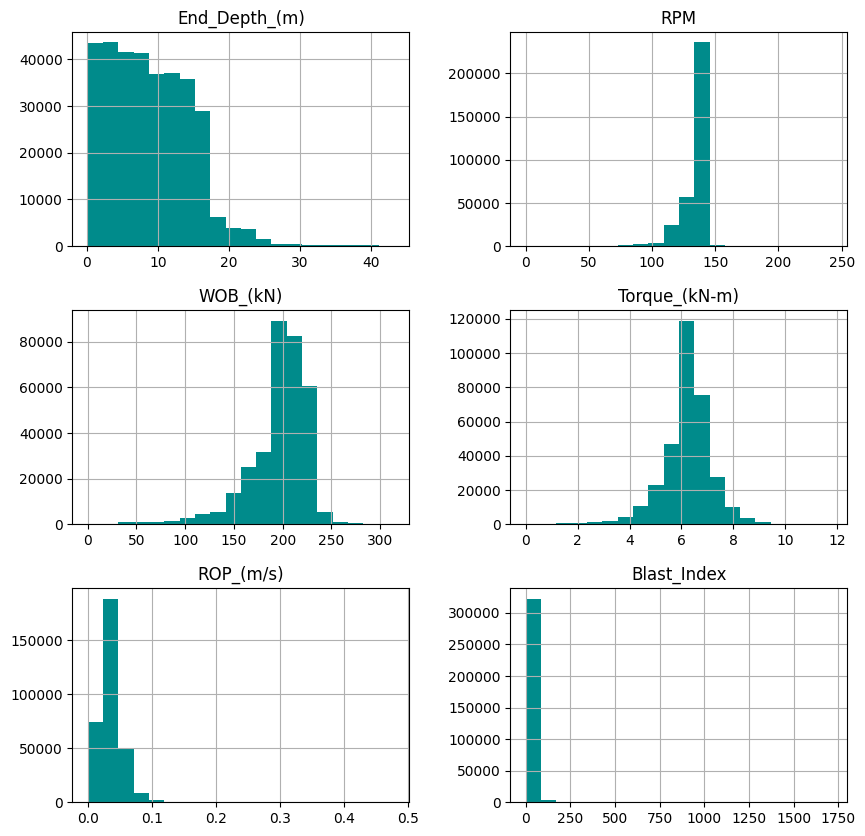

In [14]:
#View each feature as a histogram 
mwd.hist(bins=20, figsize=(10,10), color="darkcyan")

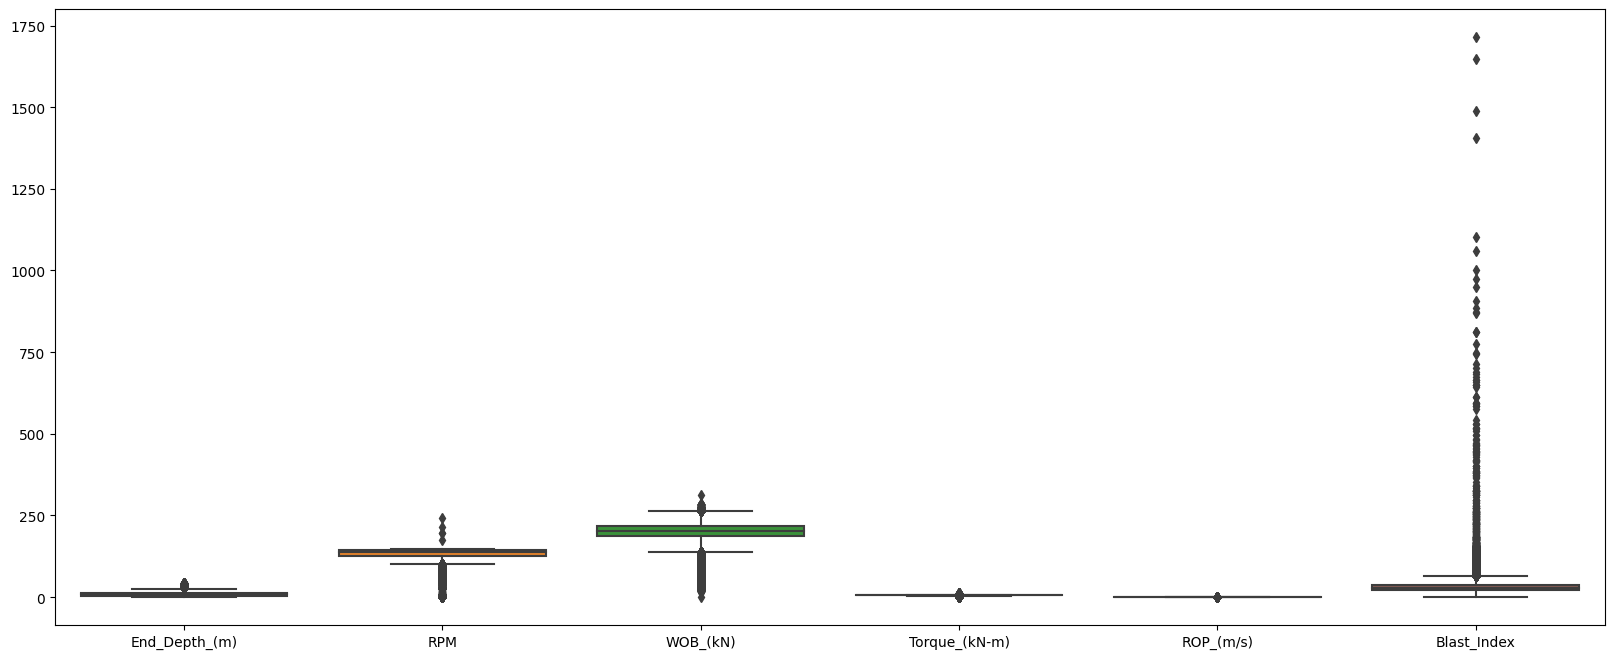

In [15]:
#do initial boxplot to show outliers
plt.figure(figsize = (20, 8))
sns.boxplot(data = mwd, width = 0.8)
plt.show()

Blast_Index has a lot of outliers - looks at this individually

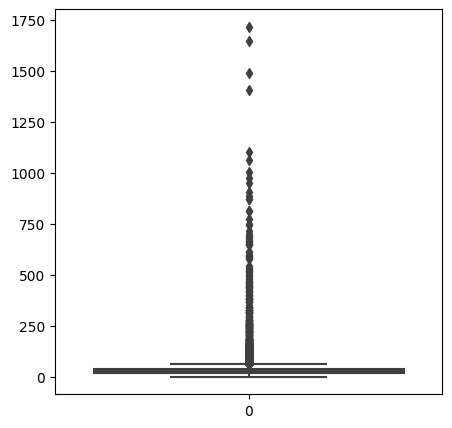

In [16]:
#do a boxplot to show outliers for Blast_Index only
plt.figure(figsize = (5, 5))
sns.boxplot(data = mwd['Blast_Index'], width = 0.8)
plt.show()

In [17]:
mwd['Blast_Index'].value_counts()

0.0      2395
25.6     1201
27.1     1173
24.2     1167
26.1     1161
         ... 
365.7       1
139.9       1
275.8       1
216.9       1
131.3       1
Name: Blast_Index, Length: 1684, dtype: int64

After discussions with the business, the feature Blast_Index is a derived field and is likely innacurate and should be removed from the model

In [18]:
mwd.drop(['Blast_Index'], axis=1, inplace=True)

<p style="font-family: Arial; font-size:1.4em;color:green;"> Model Target </p>

In [19]:
mwd['Rock_ID'].value_counts()

4                  141551
5                   94429
2 - Of interest     36209
2 - Of Interest     26358
3                   23165
1                    4724
Name: Rock_ID, dtype: int64

each ID is a different type of rock, I am only interested in if it's 2 (Coal) or anything else

In [20]:
mwd['Rock_ID'] = mwd['Rock_ID'].replace(['2 - Of interest', '2 - Of Interest','4','5','3','1' ],[1,1,0,0,0,0])

In [21]:
mwd['Rock_ID'].value_counts()

0    263869
1     62567
Name: Rock_ID, dtype: int64

1 = Is coal

0 = Is not coal

In [22]:
#Change Rock_ID so it makes more sense (change to Coal/Not_Coal in line with business question)
mwd=mwd.rename(columns= {'Rock_ID' : 'Coal/Not_Coal'})

<p style="font-family: Arial; font-size:1.4em;color:green;"> FORWARD FEATURE SELECTION </p>

In [23]:
## Flag intermediate output
show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [24]:
#Creating features and a label variable
X = mwd.drop(columns = ['HOLE_ID','Drill_ID','Start_Time','End_Time','Coal/Not_Coal'], axis = 1)
y = mwd['Coal/Not_Coal']

In [25]:
mwd.head()

HOLE_ID Drill_ID      Start_Time        End_Time  End_Depth_(m)    RPM  \
0     EA1       M1  1/03/2019 1:37  1/03/2019 1:37            0.1  143.9   
1     EA1       M1  1/03/2019 1:37  1/03/2019 1:37            0.2  143.3   
2     EA1       M1  1/03/2019 1:37  1/03/2019 1:37            0.3  143.7   
3     EA1       M1  1/03/2019 1:37  1/03/2019 1:37            0.4  144.0   
4     EA1       M1  1/03/2019 1:38  1/03/2019 1:37            0.5  143.3   

   WOB_(kN)  Torque_(kN-m)  ROP_(m/s)  Coal/Not_Coal  
0    106.31            2.5     0.0094              0  
1    106.55            2.6     0.0686              0  
2    110.85            3.4     0.0655              0  
3    112.90            3.6     0.0717              1  
4    113.54            3.6     0.0617              1

In [26]:
#split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [27]:
X

End_Depth_(m)    RPM  WOB_(kN)  Torque_(kN-m)  ROP_(m/s)
0                 0.1  143.9    106.31            2.5     0.0094
1                 0.2  143.3    106.55            2.6     0.0686
2                 0.3  143.7    110.85            3.4     0.0655
3                 0.4  144.0    112.90            3.6     0.0717
4                 0.5  143.3    113.54            3.6     0.0617
...               ...    ...       ...            ...        ...
326431           19.7  138.5    232.92            5.6     0.0694
326432           19.8  138.5    232.77            6.1     0.0449
326433           19.9  138.5    232.46            6.1     0.0559
326434           20.0  138.2    232.55            6.1     0.0432
326435           20.1  138.5    142.78            3.4     0.0307

[326436 rows x 5 columns]

In [28]:
X_train.shape[0]

228505

In [29]:
## Use Forward Feature Selection to pick a good model
from sklearn.linear_model import LogisticRegression
# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LogisticRegression()
# get the number of cases in the training data
n = X_train.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = ROP_(m/s), Torque_(kN-m), RPM, WOB_(kN), End_Depth_(m)
(Step) Trying ROP_(m/s)...
(Step) - Features = ROP_(m/s)
(Step) - Adjusted R^2: This = 0.877; Best = 0.000
(Step) - New Best!   : Feature = ROP_(m/s); R^2 = 0.877; Adjusted R^2 = 0.877
(Step) Trying Torque_(kN-m)...
(Step) - Features = Torque_(kN-m)
(Step) - Adjusted R^2: This = 0.822; Best = 0.877
(Step) Trying RPM...
(Step) - Features = RPM
(Step) - Adjusted R^2: This = 0.809; Best = 0.877
(Step) Trying WOB_(kN)...
(Step) - Features = WOB_(kN)
(Step) - Adjusted R^2: This = 0.810; Best = 0.877
(Step) Trying End_Depth_(m)...
(Step) - Features = End_Depth_(m)
(Step) - Adjusted R^2: This = 0.809; Best = 0.877
Added feature ROP_(m/s) with R^2 = 0.877 and adjusted R^2 = 0.877

(Step) Excluded = WOB_(kN), End_Depth_(m), Torque_(kN-m), RPM
(Step) Trying WOB_(kN)...
(Step) - Features = ROP_(m/s), WOB_(kN)
(Step) - Adjusted R^2: This = 0.889; Best = 0.877
(Step) - New Best!   : Feature = WOB_(kN); R^2 = 0.889; Adjusted R

Fwd feature selection shows that for the logistic regression model it is best to use all 4 features

Logistic regression model in Mini Project 3 with 4 features and hyperparameter tuning on 'newtoncg' was the highest accuracy logistic regression model. This had accuracy of 90.53 with recall of 0.99 for coal and 0.57 for not coal. The false negatives are an issue and further models will be run to try and increase the accuracy for the "not coal" data

<p style="font-family: Arial; font-size:1.4em;color:green;"> Logistic Regression Model including outliers (4 features, newtoncg) </p>

In [30]:
# create X and y to match Scikit-Learn parlance

features = ['WOB_(kN)', 'ROP_(m/s)', 'RPM','Torque_(kN-m)' ]
outcome = 'Coal/Not_Coal'

X = mwd[features].copy()
y=mwd[outcome]

Accuracy is:  0.905966253722016
              precision    recall  f1-score   support

           0       0.91      0.99      0.94     65967
           1       0.90      0.57      0.70     15642

    accuracy                           0.91     81609
   macro avg       0.90      0.78      0.82     81609
weighted avg       0.91      0.91      0.90     81609

Coefficient is: [[-3.12943586e-03  6.68052565e+01 -8.70514325e-03 -8.24312721e-01]]
Intercept is: [2.57593486]


C:\Users\LeahPettigrew\anaconda3\envs\IOD\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LeahPettigrew\anaconda3\envs\IOD\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


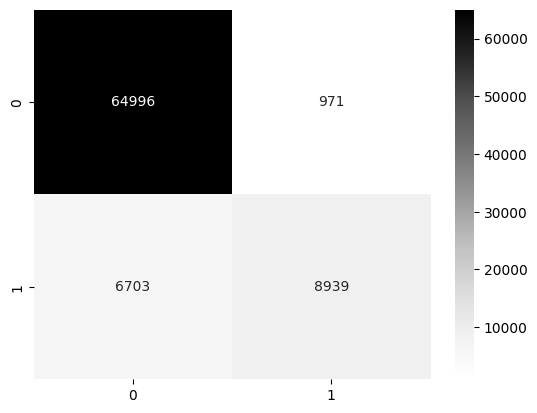

In [31]:
#split into train and test - use stratify=y as it is imbalanced data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

#select the model
log_model = LogisticRegression(solver='newton-cg')

#fit the model
log_model.fit(X_train, y_train)

#score the model
log_model.score(X_test, y_test)

#predict the accuracy
y_pred = log_model.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d", cmap="Greys");
print(classification_report(y_test, y_pred))
print('Coefficient is:',(log_model.coef_))
print('Intercept is:', log_model.intercept_)

It is actually slightly more accurate keeping the outliers in the data. When removing the outliers and running the same model the accuracy was 90.534.  Recall is still 0.57

<p style="font-family: Arial; font-size:1.4em;color:green;"> Decision Tree including outliers and Manual Hyperparameter tuning </p>

In [32]:
# create X and y to match Scikit-Learn parlance
features = ['WOB_(kN)', 'ROP_(m/s)', 'RPM','Torque_(kN-m)' ]
outcome = 'Coal/Not_Coal'

X = mwd[features].copy()
y=mwd[outcome]

In [33]:
#split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=50)

In [34]:
X_train.shape, X_test.shape

((195861, 4), (130575, 4))

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
#fit the decision tree model
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

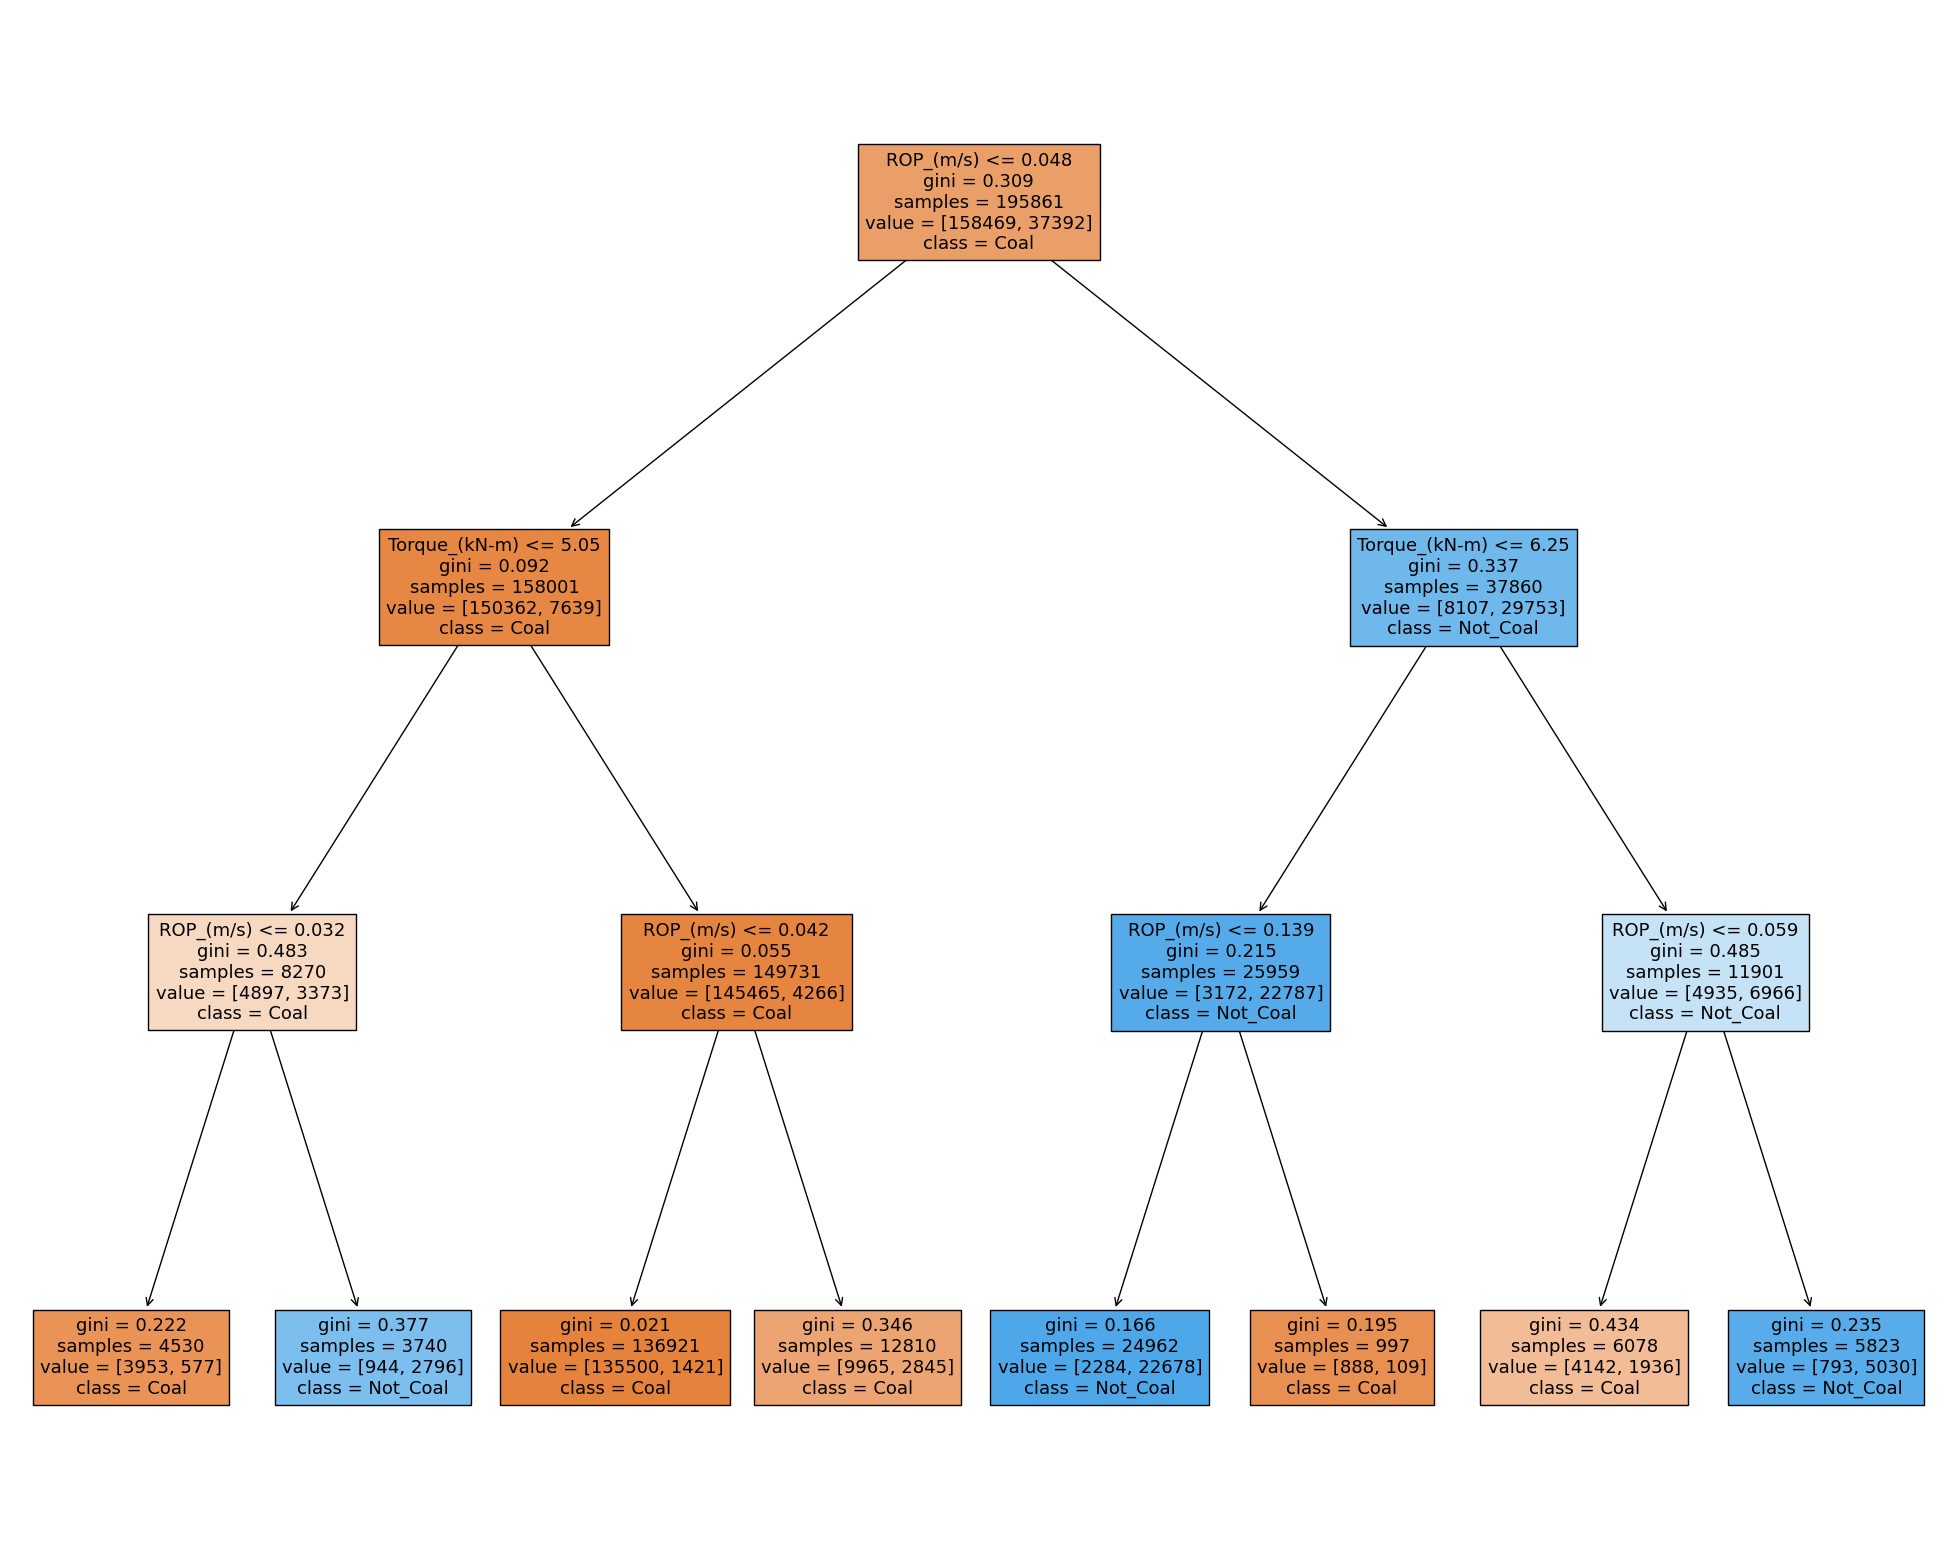

In [37]:
#draw the tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['Coal', "Not_Coal"],
                   filled=True)

In [38]:
#evaluate model performance
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
#confusion matrix for training
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9443023368613456


array([[154448,   4021],
       [  6888,  30504]], dtype=int64)

In [41]:
#confusing matrix for testing

confusion_matrix(y_test, y_test_pred)

array([[102680,   2720],
       [  4604,  20571]], dtype=int64)

_______________confusion matrix on testing data______________

Accuracy Score =
0.9439096304805668


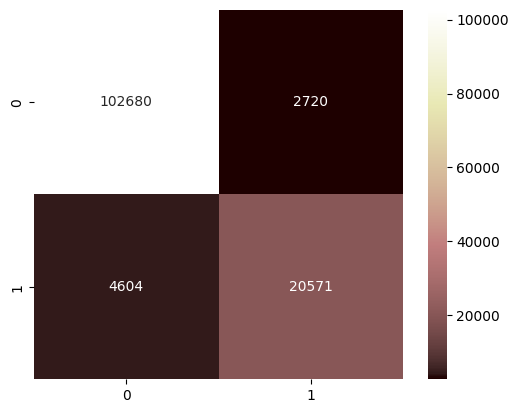

In [42]:
cm = confusion_matrix(y_test, y_test_pred)
print("_______________confusion matrix on testing data______________")
print()
print("Accuracy Score =")
sns.heatmap(cm,annot=True,fmt="d", cmap="pink", square=True);
print(accuracy_score(y_test, y_test_pred))


In [43]:
#define tree plot
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['Coal', "Not_Coal"],
                       filled=True)

In [44]:
#define evalute model
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print()
    print("-"*50)
    print()         
    cm = confusion_matrix(y_test, dt_classifier.predict(X_test))
    print("Test Scores & Confusion Matrix:")
    print()
    print("Accuracy Score =")
    sns.heatmap(cm,annot=True,fmt="d", cmap="pink", square=True);
    print(accuracy_score(y_test, dt_classifier.predict(X_test)))


In [45]:
#without setting any hyperparameters
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

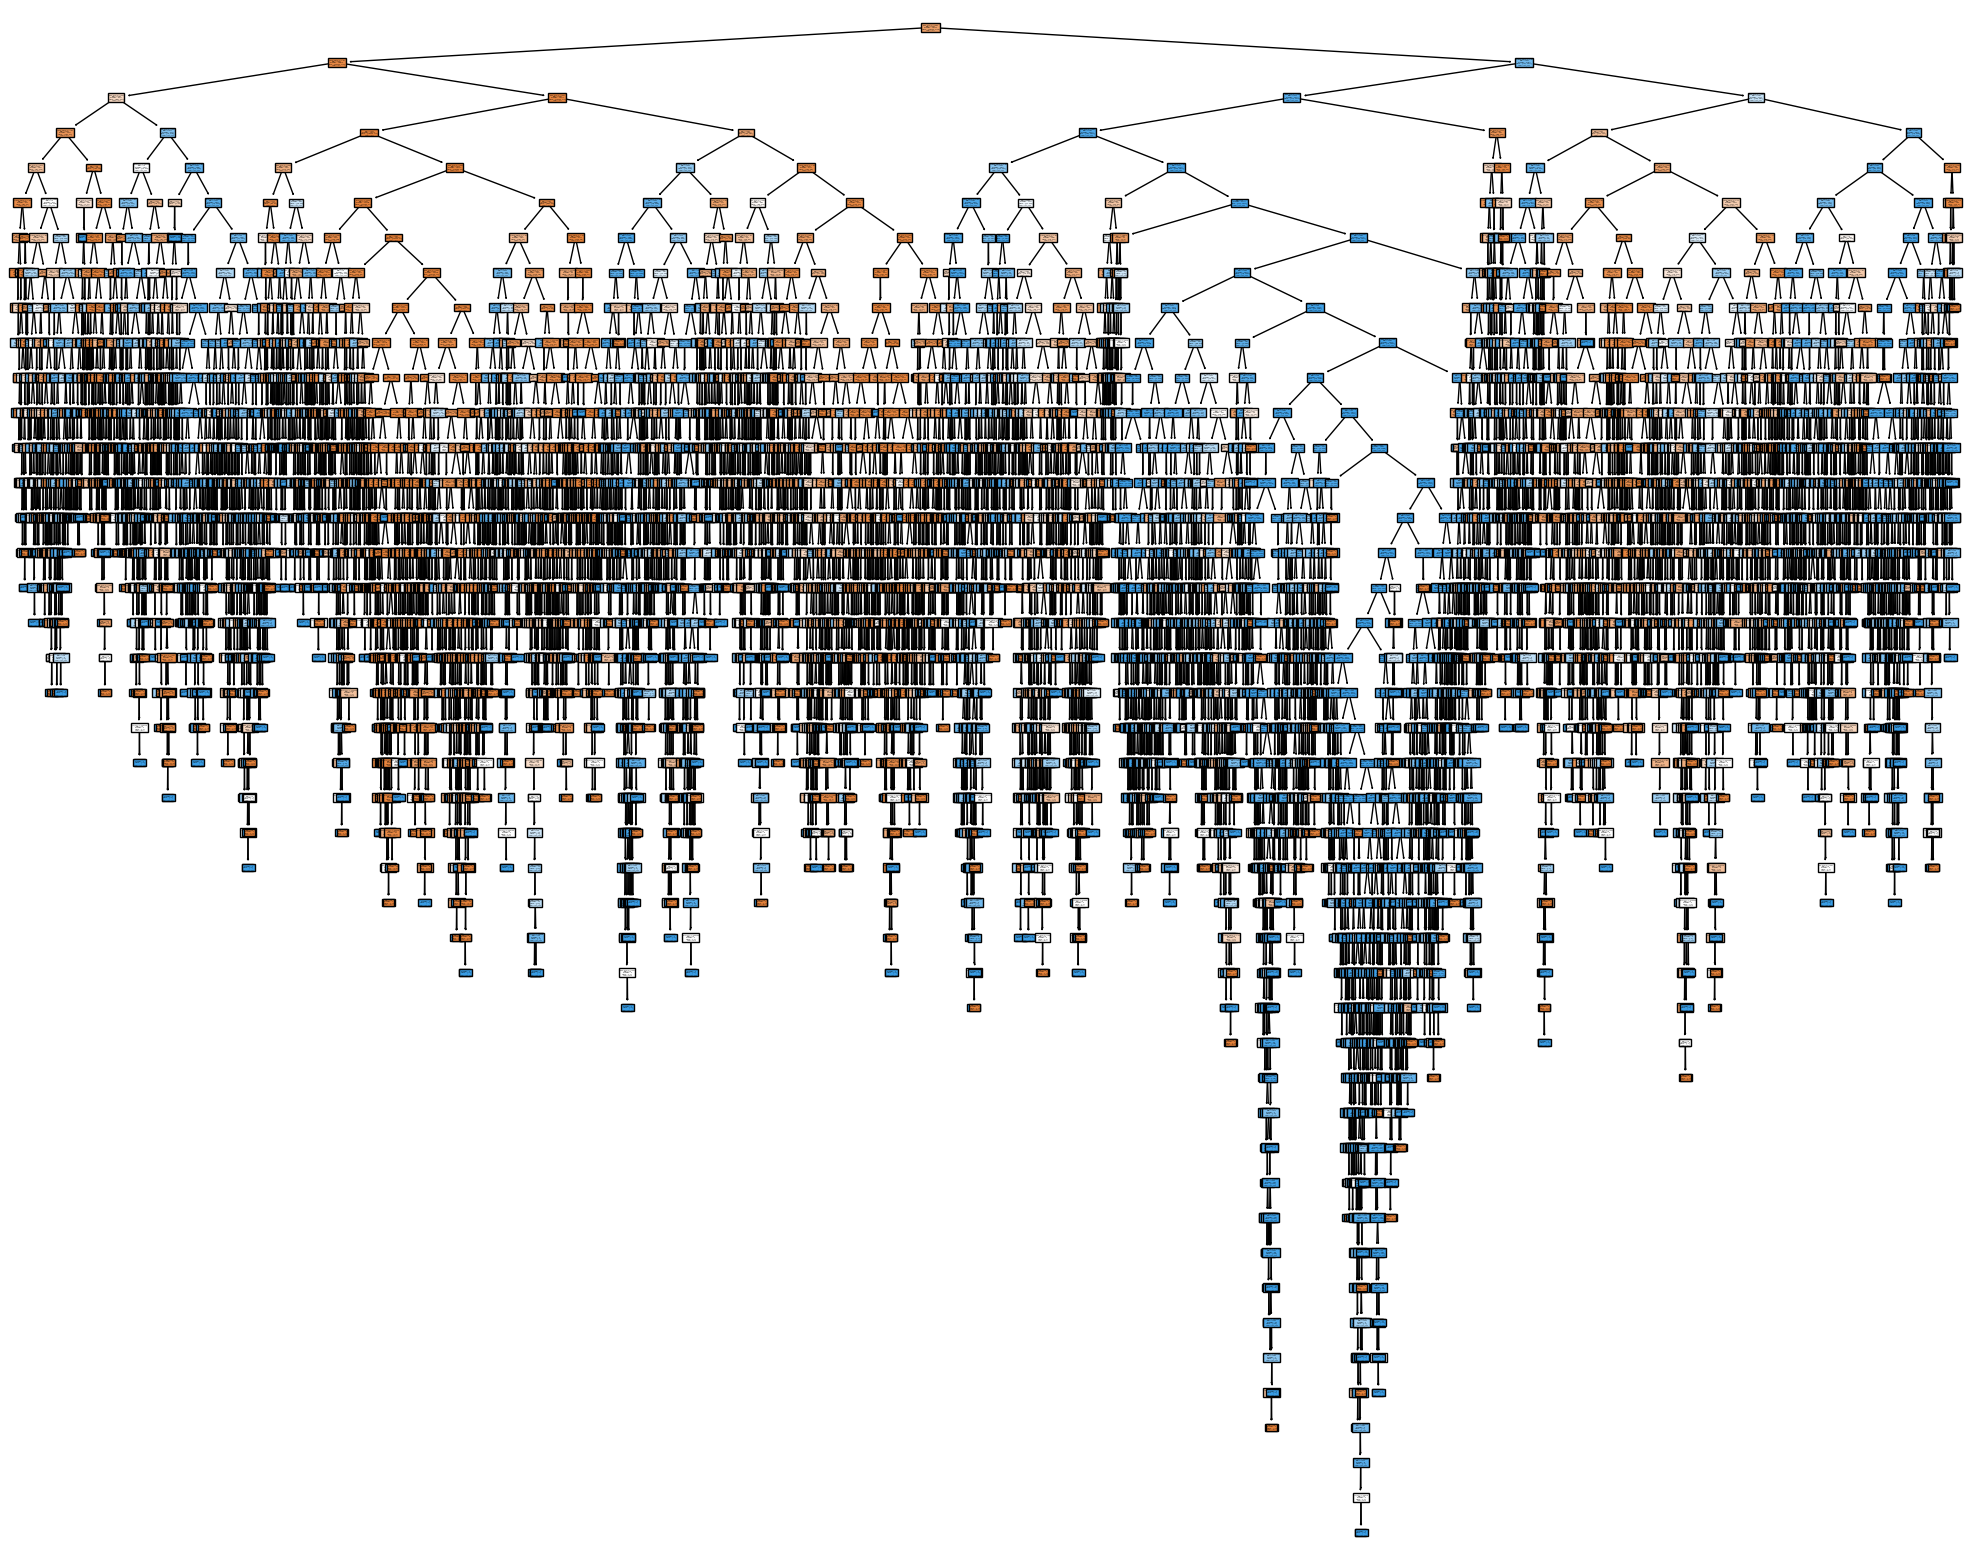

In [46]:
#show the tree
gph = get_dt_graph(dt_default)

Confusion Matrix on Default decision tree with no hyperparameters

Train Accuracy : 0.9999285207366448
Train Confusion Matrix:
[[158469      0]
 [    14  37378]]

--------------------------------------------------

Test Scores & Confusion Matrix:

Accuracy Score =
0.9557265939115451


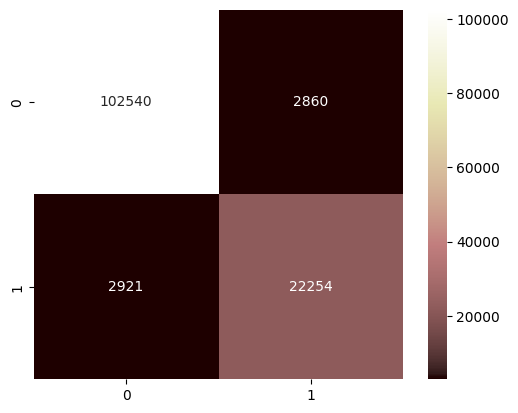

In [47]:
#evaluate the default model
print("Confusion Matrix on Default decision tree with no hyperparameters")
print()
evaluate_model(dt_default)

In [48]:
#controlling the depth of the tree
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

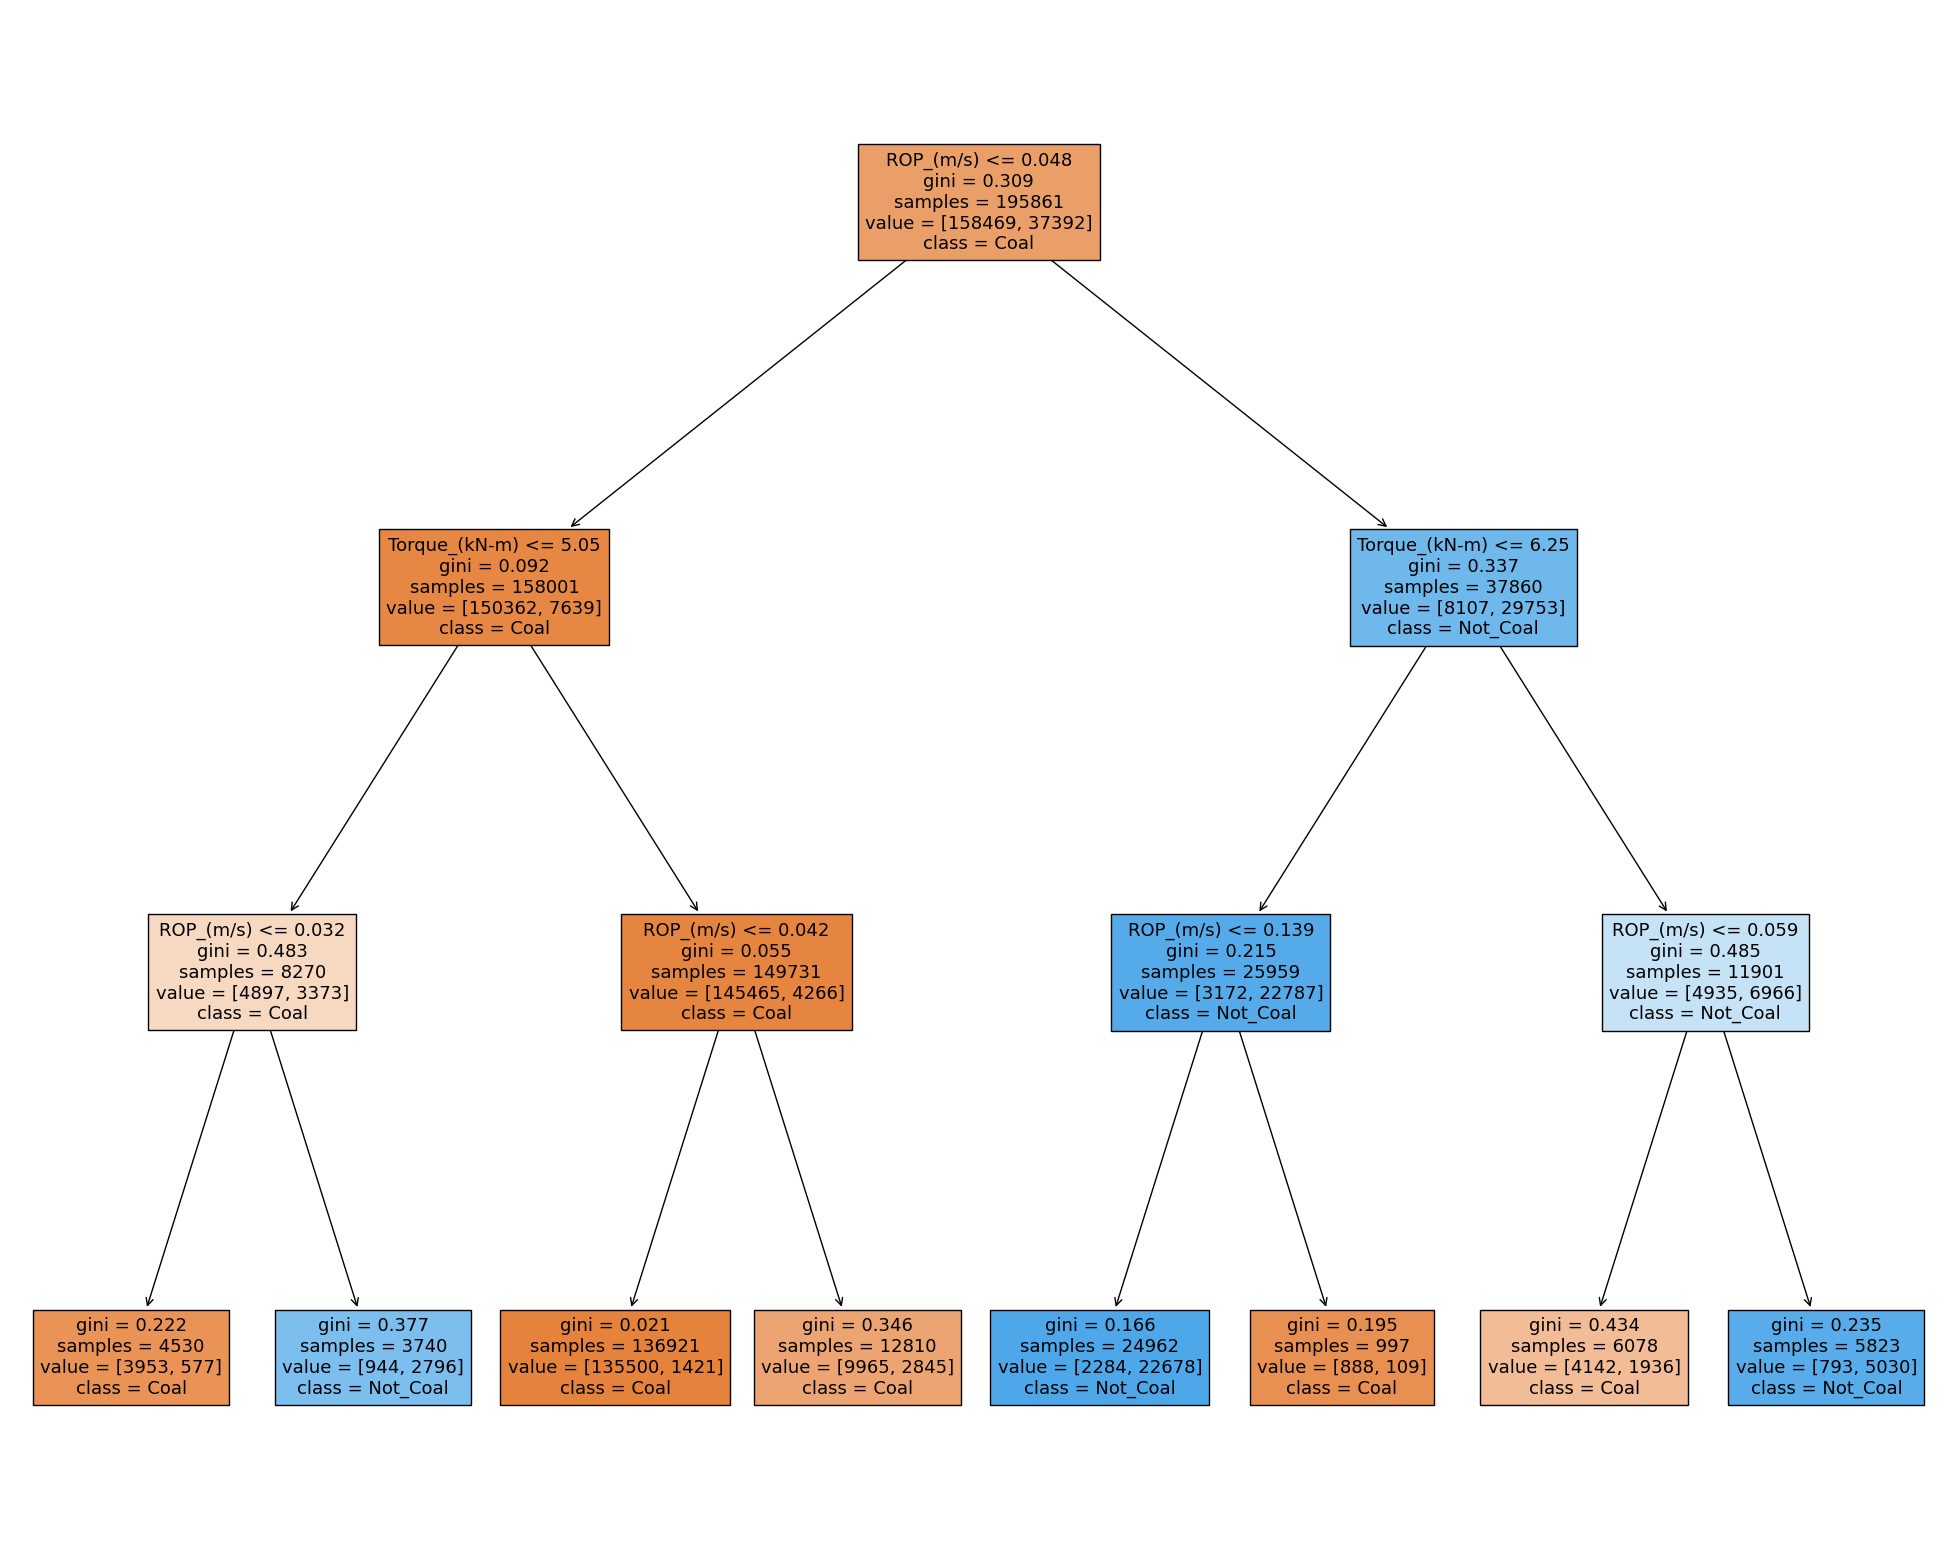

In [49]:
gph = get_dt_graph(dt_depth) 

Confusion Matrix on Decision Tree with a max depth of 3

Train Accuracy : 0.9443023368613456
Train Confusion Matrix:
[[154448   4021]
 [  6888  30504]]

--------------------------------------------------

Test Scores & Confusion Matrix:

Accuracy Score =
0.9439096304805668


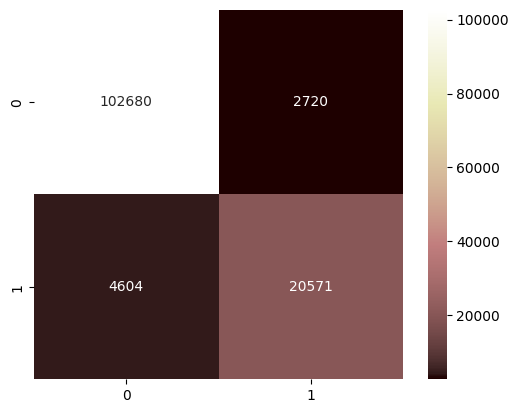

In [50]:
#evaluate the default model
print("Confusion Matrix on Decision Tree with a max depth of 3")
print()
evaluate_model(dt_depth)

Controlling the depth of the tree gives 94% accuracy. try with another layer?

In [51]:
#specifiying minimum samples before split
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

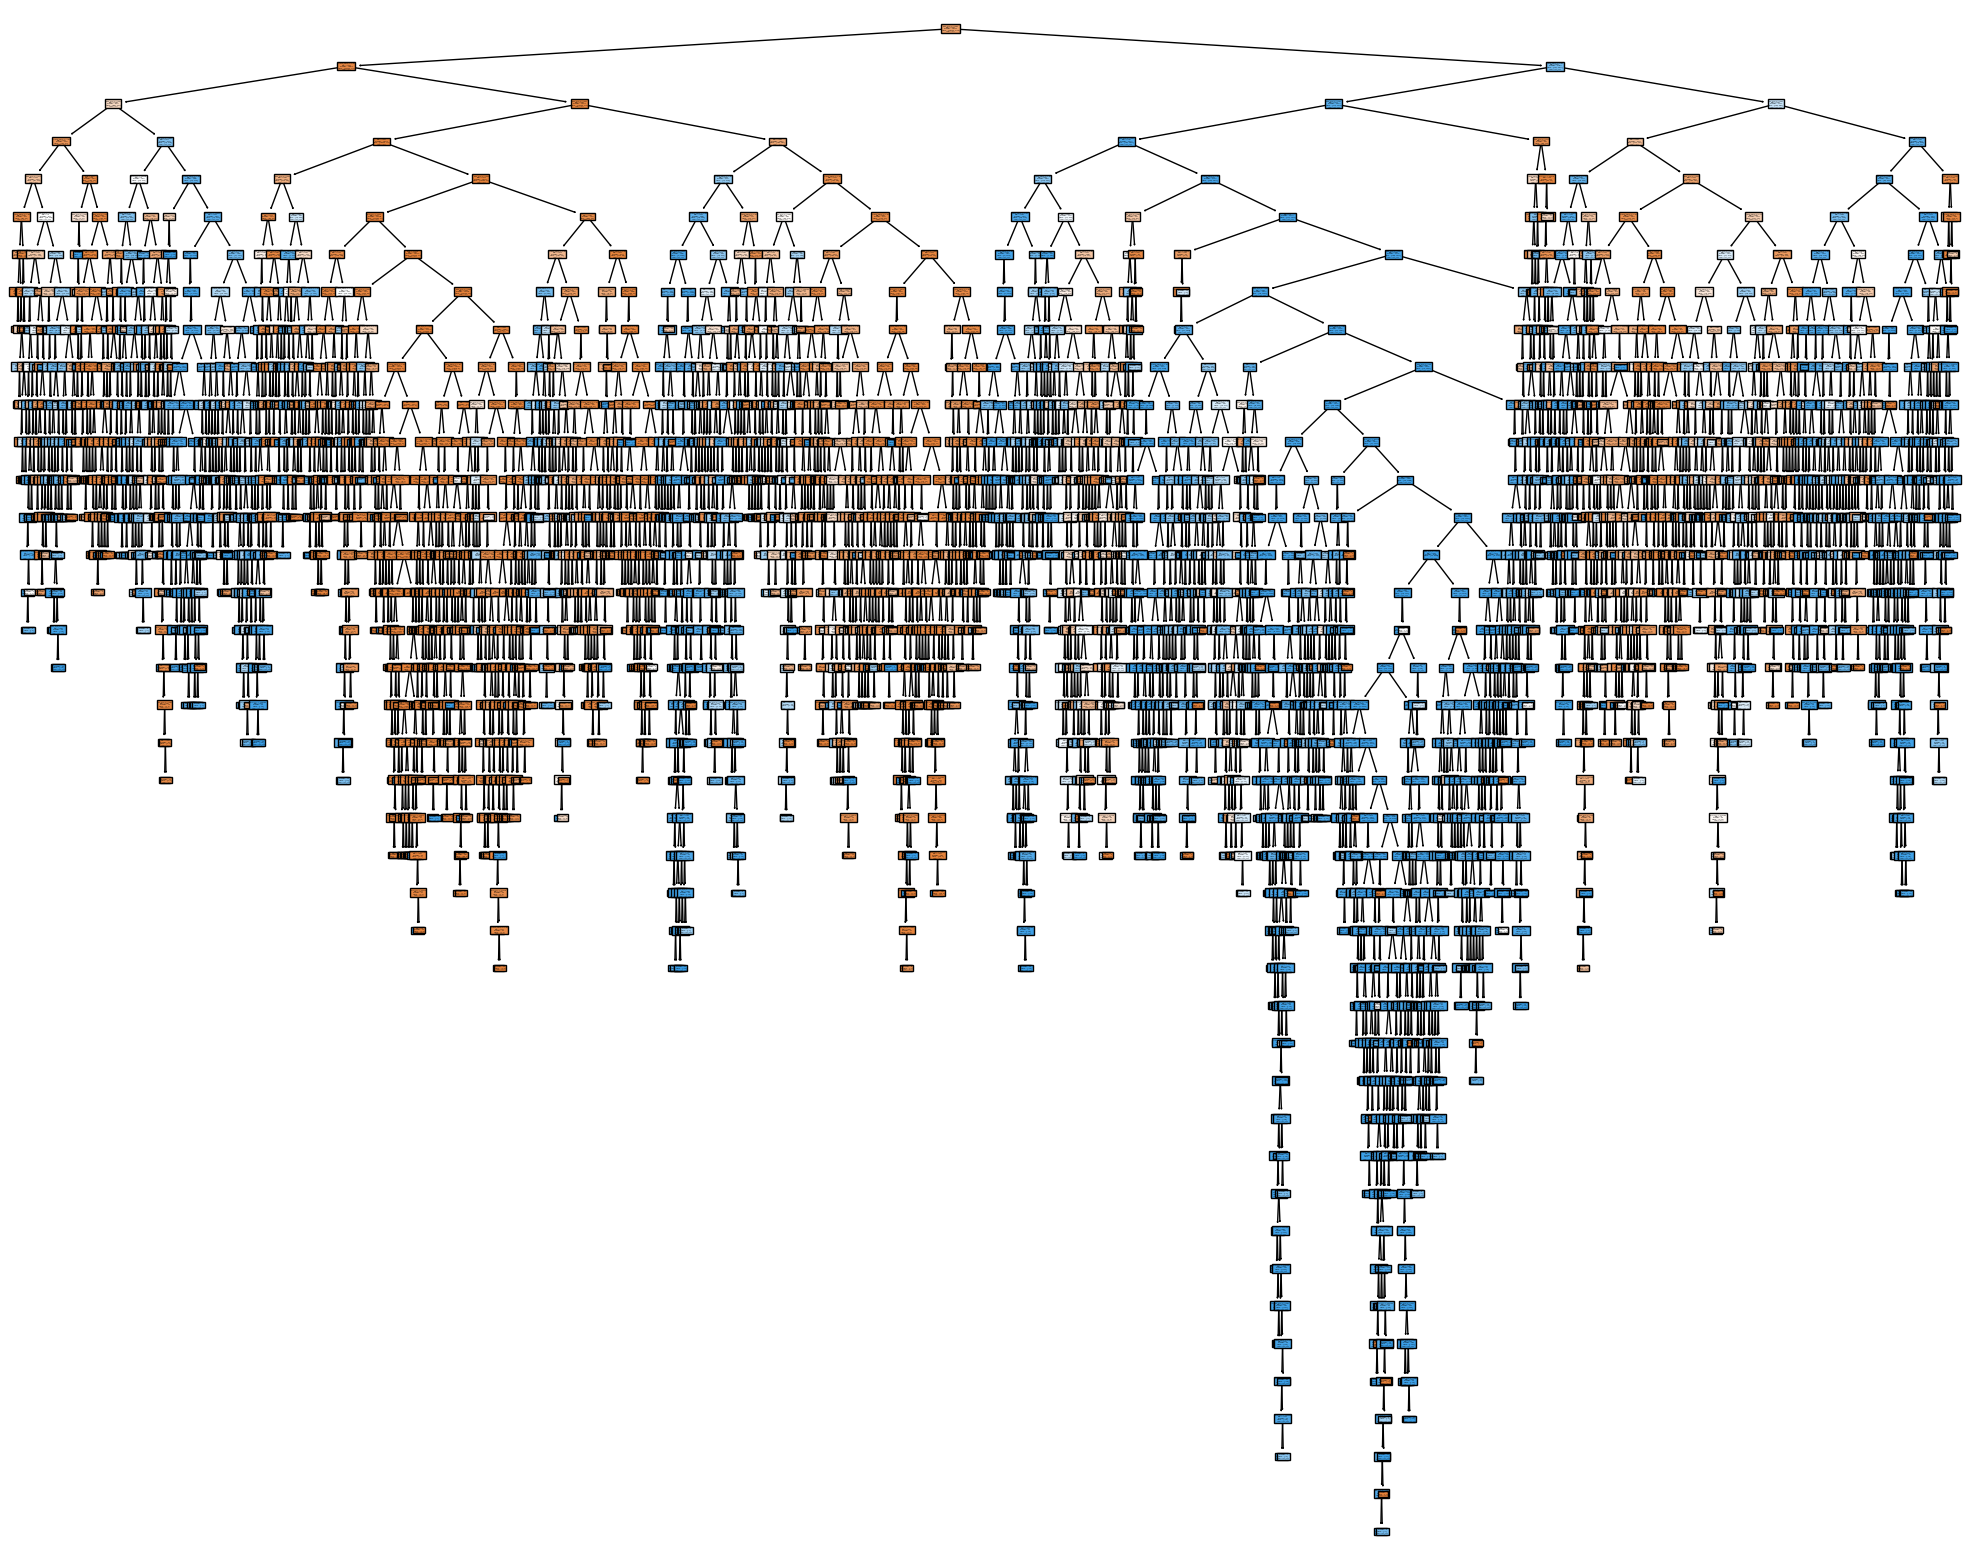

In [52]:
#print tree with min splits
gph = get_dt_graph(dt_min_split) 

Confusion Matrix on Decision Tree with minimum samples of 20 before split

Train Accuracy : 0.9810069385942071
Train Confusion Matrix:
[[156653   1816]
 [  1904  35488]]

--------------------------------------------------

Test Scores & Confusion Matrix:

Accuracy Score =
0.962511966302891


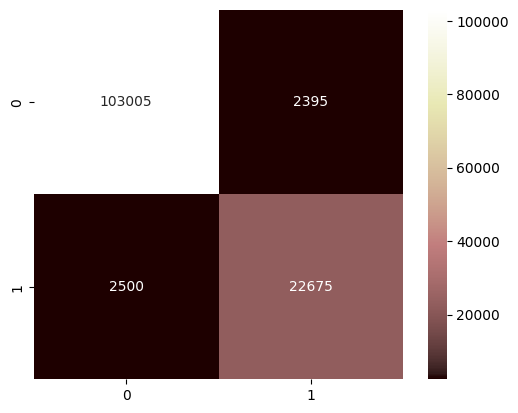

In [53]:
#evaluate the default model
print("Confusion Matrix on Decision Tree with minimum samples of 20 before split")
print()
evaluate_model(dt_min_split)

In [54]:
#specifying minimum values in leaf node
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

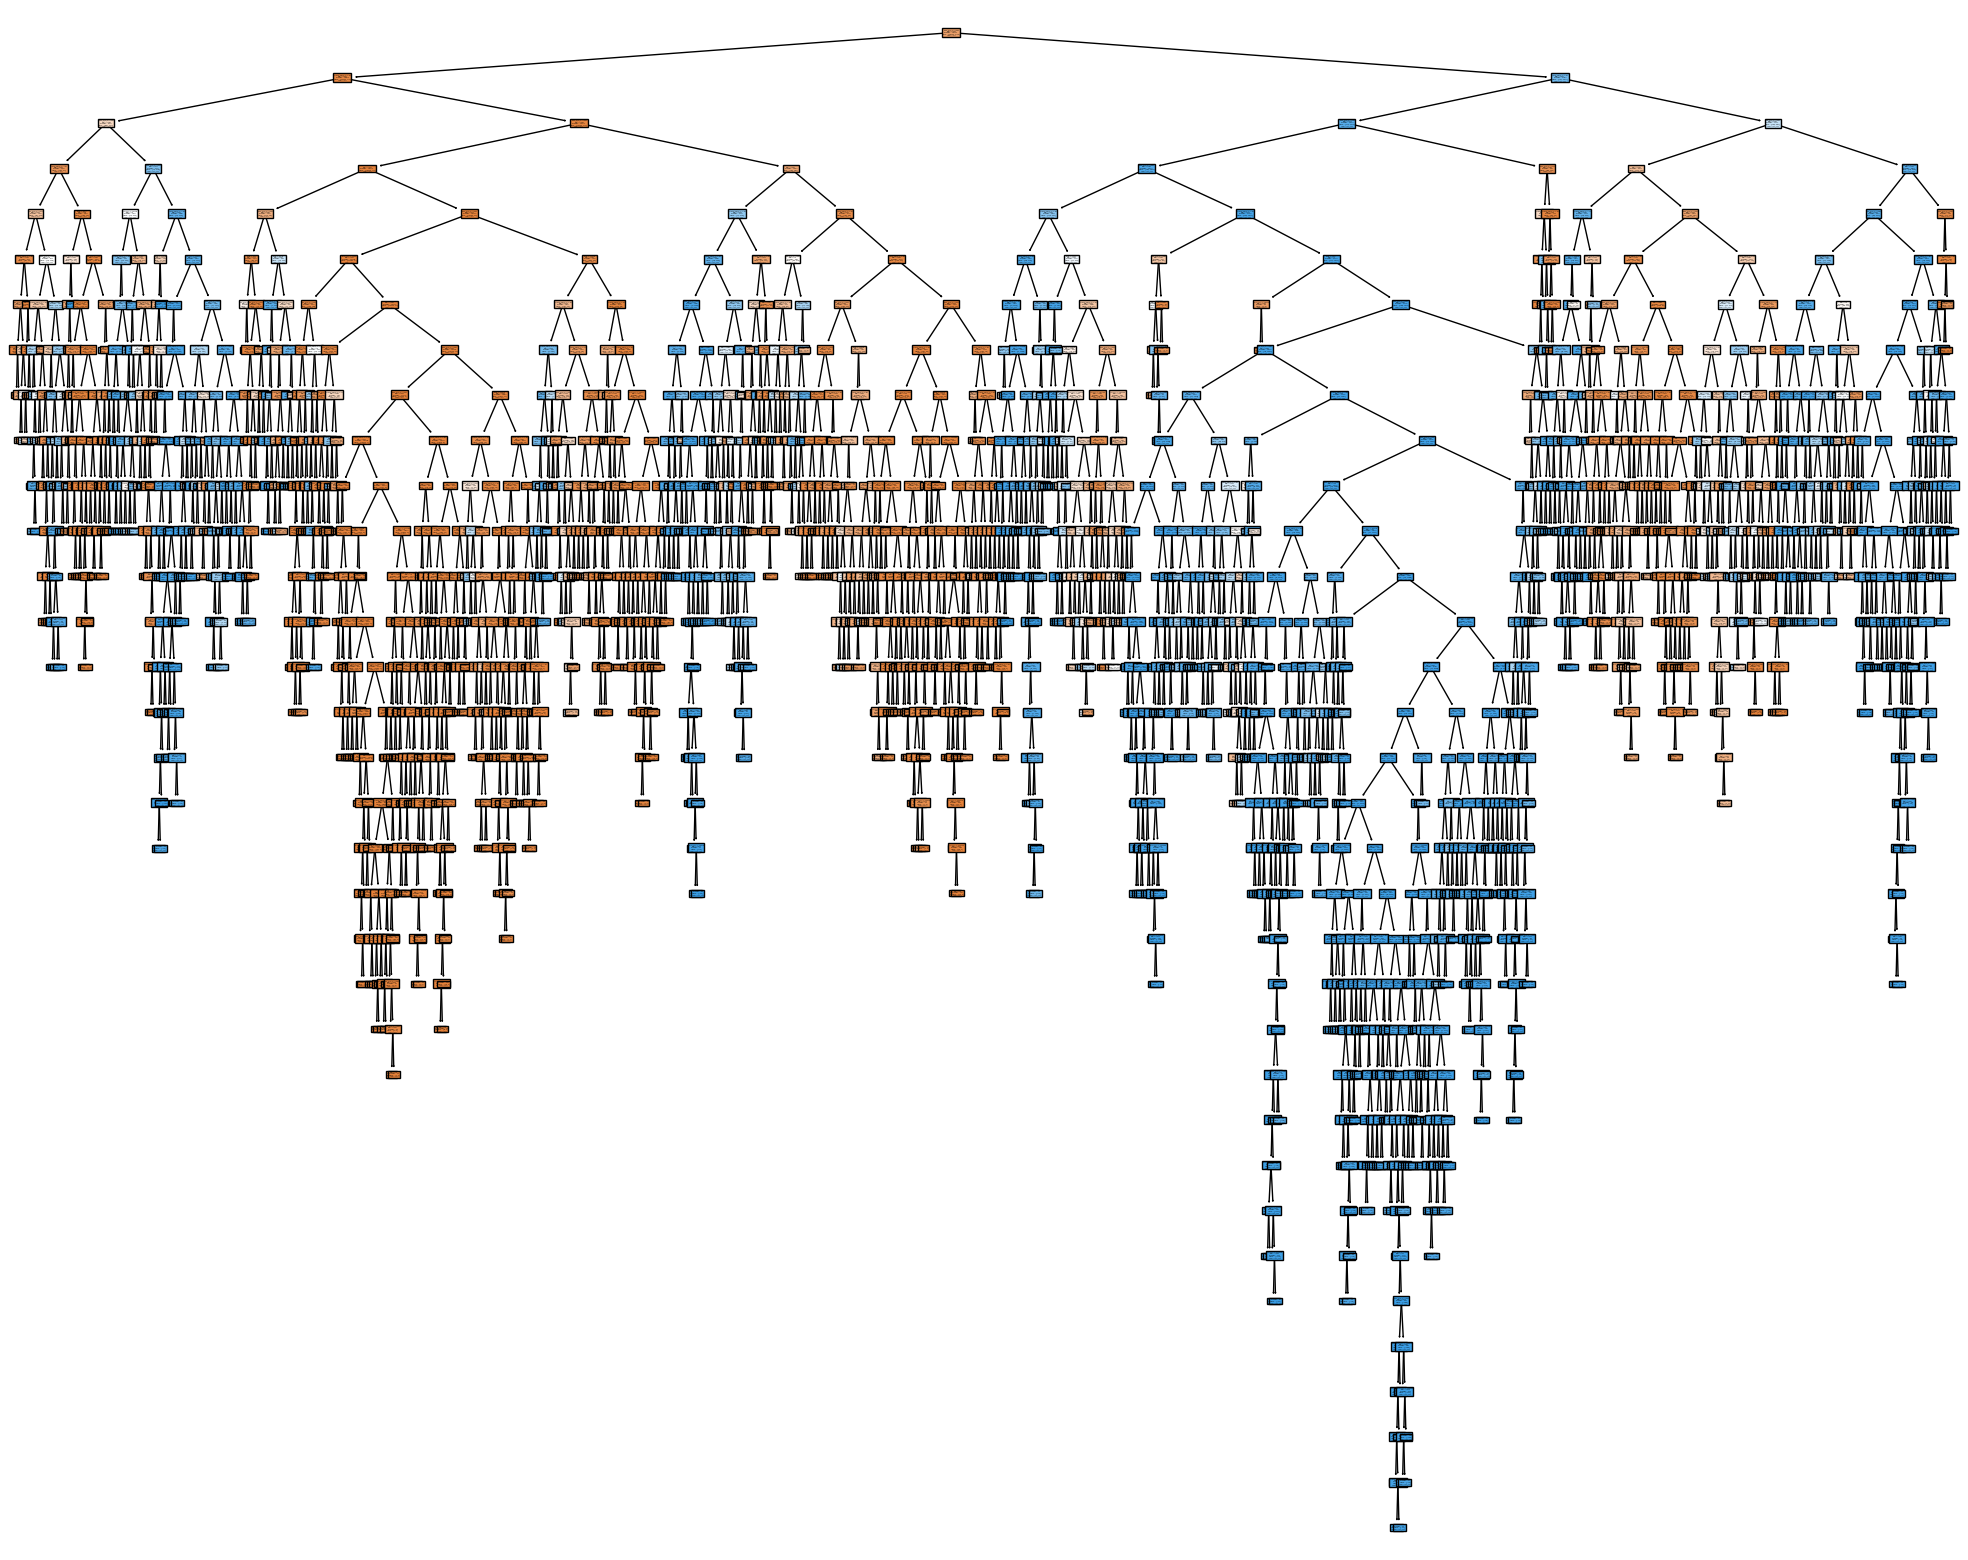

In [55]:
#print tree wiht minimum values in leaf node
gph = get_dt_graph(dt_min_leaf)

Confusion Matrix on Decision Tree with minimum value in leaf nodes of 20

Train Accuracy : 0.9733535517535395
Train Confusion Matrix:
[[155811   2658]
 [  2561  34831]]

--------------------------------------------------

Test Scores & Confusion Matrix:

Accuracy Score =
0.9674976067394218


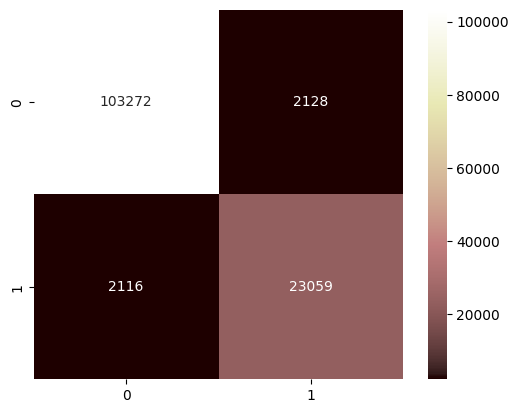

In [56]:
#evaluate the default model
print("Confusion Matrix on Decision Tree with minimum value in leaf nodes of 20")
print()
evaluate_model(dt_min_leaf)

In [57]:
#using entropy instead of Gini
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

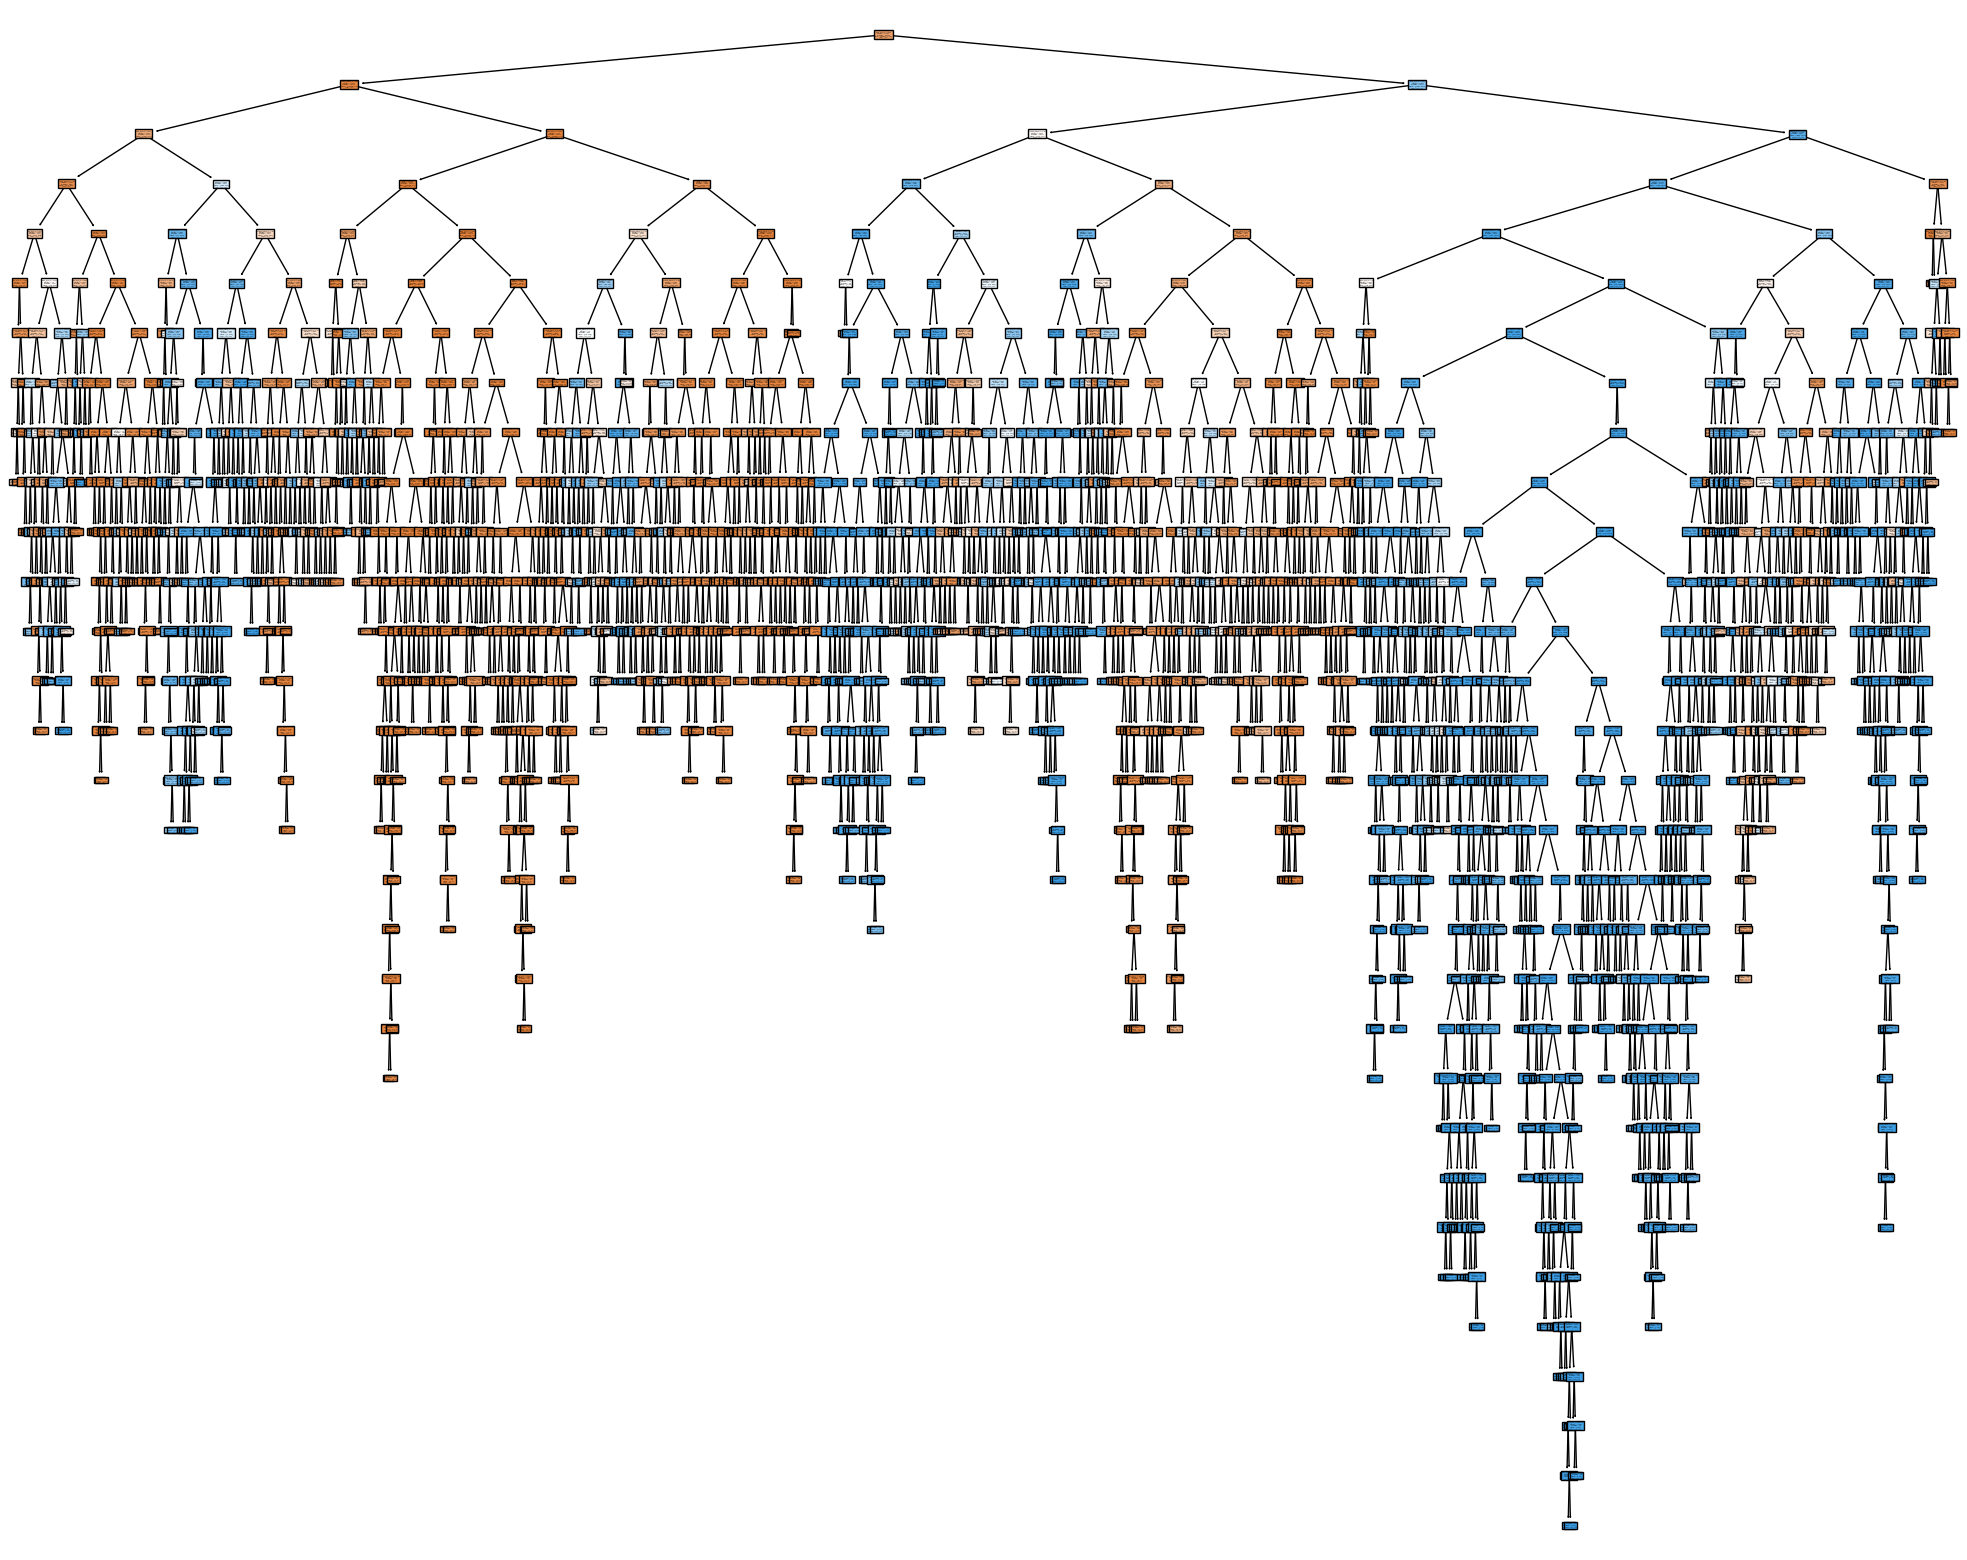

In [58]:
gph = get_dt_graph(dt_min_leaf_entropy)

Confusion Matrix on Decision Tree using entropy instead of Gini

Train Accuracy : 0.9733280234451984
Train Confusion Matrix:
[[155905   2564]
 [  2660  34732]]

--------------------------------------------------

Test Scores & Confusion Matrix:

Accuracy Score =
0.9668389814282979


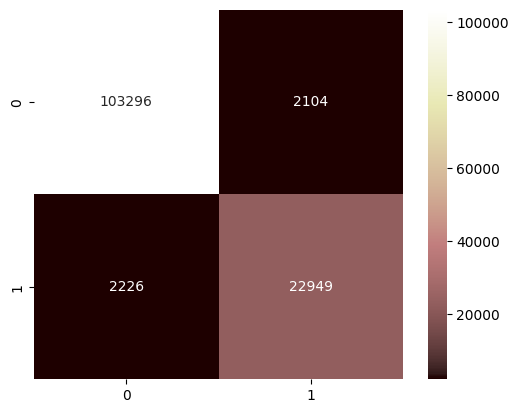

In [59]:
#evaluate the default model
print("Confusion Matrix on Decision Tree using entropy instead of Gini")
print()
evaluate_model(dt_min_leaf_entropy)

<p style="font-family: Arial; font-size:1.4em;color:green;"> Decision Tree using Gridsearch to find best Hyperparameters </p>

In [60]:
dt = DecisionTreeClassifier(random_state=42)

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [63]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [64]:
#fitting the training data
#%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [65]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.144161      0.005234         0.007491        0.003308   
1       0.153778      0.003586         0.012142        0.003487   
2       0.142107      0.006042         0.008332        0.004866   
3       0.149627      0.011464         0.012851        0.003526   
4       0.150130      0.009846         0.011764        0.000688   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.92164   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.92164   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.92164   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.92164   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.92164   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.919269           0.919677           0.918615           0.9198   
1           0.919269           0.919677           0.918615           0.9198   
2           0.919269           0.919677           0.918615           0.9198   
3           0.919269           0.919677           0.918615           0.9198   
4           0.919269           0.919677           0.918615           0.9198   

   std_test_score  rank_test_score  
0        0.001127               41  
1        0.001127               41  
2        0.001127               41  
3        0.001127               41  
4        0.001127               41

In [66]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
15       0.585239      0.010154         0.014623        0.000560   
42       0.624739      0.023899         0.015865        0.000884   
17       0.603130      0.029829         0.015053        0.000468   
41       0.612168      0.027118         0.017515        0.001856   
16       0.656726      0.040624         0.016051        0.002823   

   param_criterion param_max_depth param_min_samples_leaf  \
15            gini              10                      5   
42         entropy              10                     20   
17            gini              10                     20   
41         entropy              10                     10   
16            gini              10                     10   

                                               params  split0_test_score  \
15  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.968876   
42  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.969366   
17  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.969326   
41  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.968836   
16  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.969081   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
15           0.968488           0.967405           0.967630         0.968100   
42           0.967936           0.968161           0.966936         0.968100   
17           0.969100           0.967201           0.966221         0.967962   
41           0.968243           0.967181           0.967487         0.967936   
16           0.968447           0.967201           0.966956         0.967921   

    std_test_score  rank_test_score  
15        0.000603                1  
42        0.000865                2  
17        0.001301                3  
41        0.000647                4  
16        0.000876                5

In [67]:
#show the best estimator
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [68]:
#run the model with best estimators
dt_best = grid_search.best_estimator_

Confusion Matrix on Decision Tree using best parameters based on gridsearch

Train Accuracy : 0.973389291385217
Train Confusion Matrix:
[[155680   2789]
 [  2423  34969]]

--------------------------------------------------

Test Scores & Confusion Matrix:

Accuracy Score =
0.967834577828834


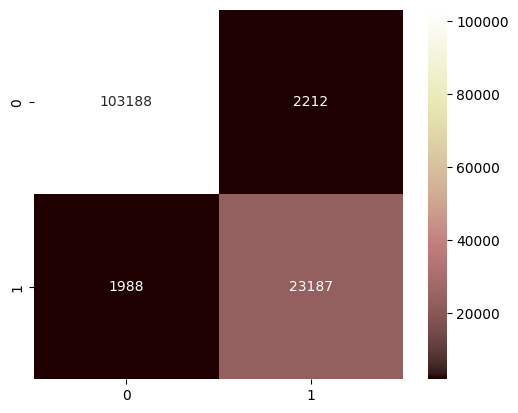

In [69]:
#evaluate the best model
print("Confusion Matrix on Decision Tree using best parameters based on gridsearch")
print()
evaluate_model(dt_best)

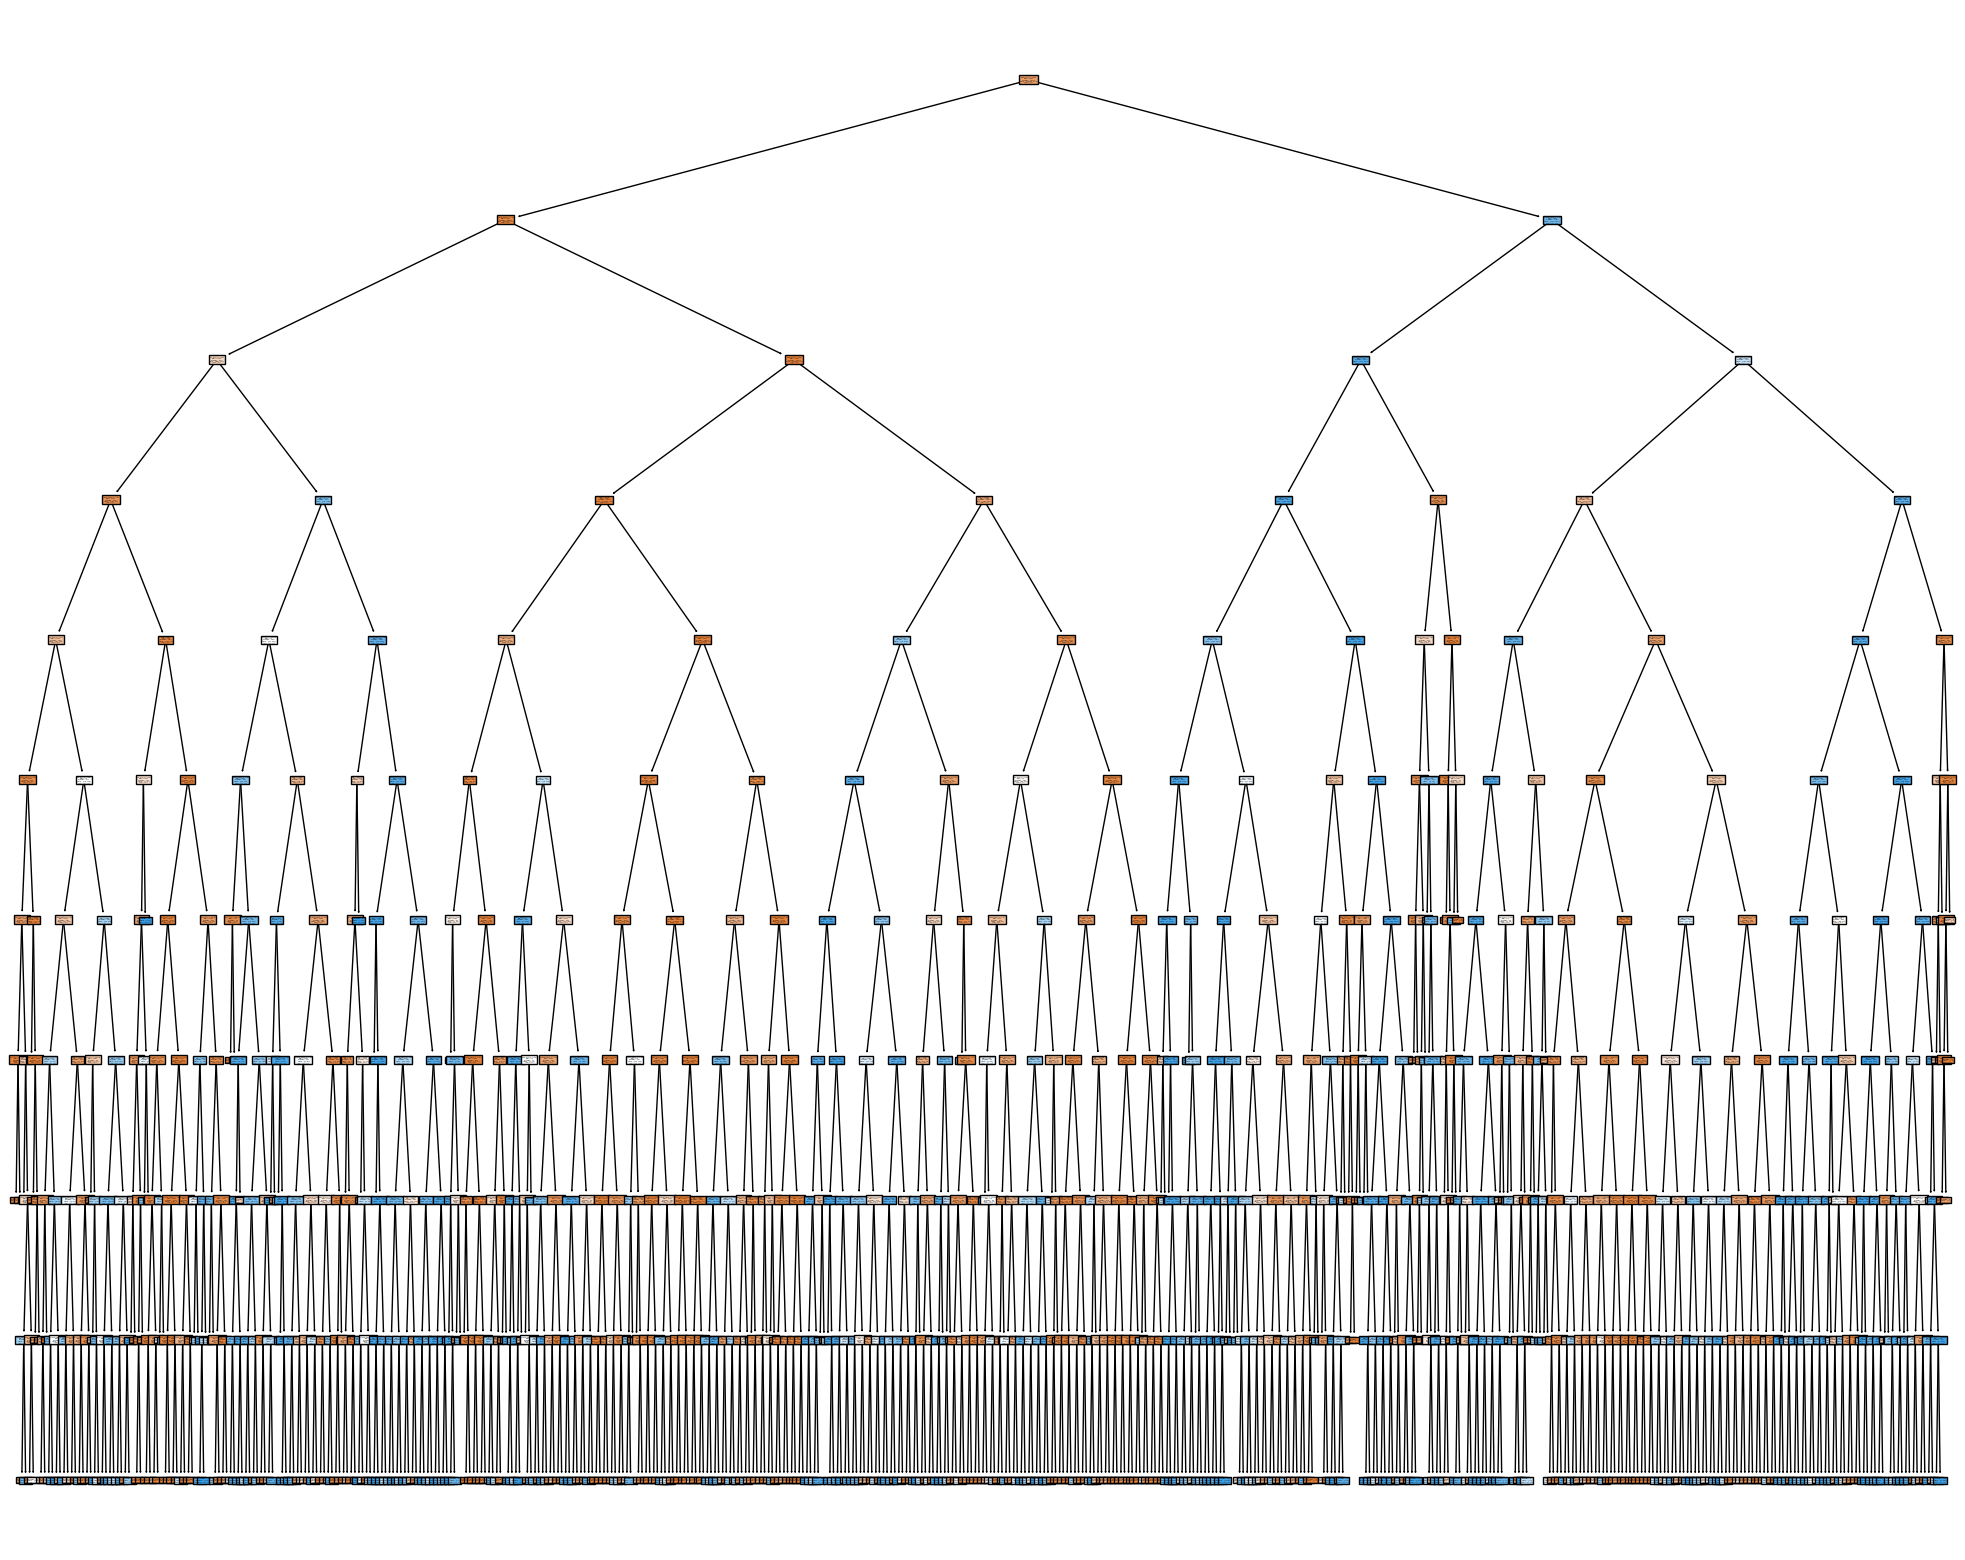

In [70]:
get_dt_graph(dt_best)

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    105400
           1       0.91      0.92      0.92     25175

    accuracy                           0.97    130575
   macro avg       0.95      0.95      0.95    130575
weighted avg       0.97      0.97      0.97    130575



<p style="font-family: Arial; font-size:1.4em;color:green;"> Stacking Model - includes outliers </p>

Run the stacking model using newston-cg in logistic regression as that was the best logistic regression model in mini project 3. 

Run using KNeighbours, Random Forest and Decision Tree

Using imbalanced data and including outliers



In [73]:
# create X and y to match Scikit-Learn parlance
features = ['WOB_(kN)', 'ROP_(m/s)', 'RPM','Torque_(kN-m)' ]
outcome = 'Coal/Not_Coal'

X = mwd[features].copy()
y=mwd[outcome]

In [74]:
# Create training and testing subsets. Straftify = y as it's imbalanced data. Will run again with balanced data
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = test_size,
                                                    random_state = 84871821,
                                                    stratify = y)

In [75]:
np.random.seed(0)

# create the sub models
clf1 = KNeighborsClassifier(n_neighbors = 5)
clf1.fit(X_train, y_train)
clf2 = RandomForestClassifier(n_estimators = 10, random_state = 1)
clf2.fit(X_train, y_train)
clf3 = DecisionTreeClassifier()
clf3.fit(X_train, y_train)
lr = LogisticRegression(multi_class = 'auto', solver = 'newton-cg')
lr.fit(X_train, y_train)

# create the ensemble model
sclf = StackingClassifier(
    classifiers = [clf1, clf2, clf3],
    meta_classifier = lr)
sclf.fit(X_train, y_train)
print()

In [76]:
kfold = model_selection.KFold(n_splits = 10)

results = model_selection.cross_val_score(sclf, X_train, y_train, cv = kfold)

print('Stacking, Cross-Validation mean: %.4f' % results.mean())

Stacking, Cross-Validation mean: 0.9561


In [77]:
#Verify and Evaluate the Training Model

def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(float)
        
    prediction_int = np.round(prediction)

    accuracy_ = accuracy_score(actual, prediction_int)
    precision_ = precision_score(actual, prediction_int)
    recall_ = recall_score(actual, prediction_int)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction_int)
    average_precision = average_precision_score(actual, prediction_int)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

********
* K-NN *
********
Accuracy : 0.8863 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8019 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5406 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9320                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


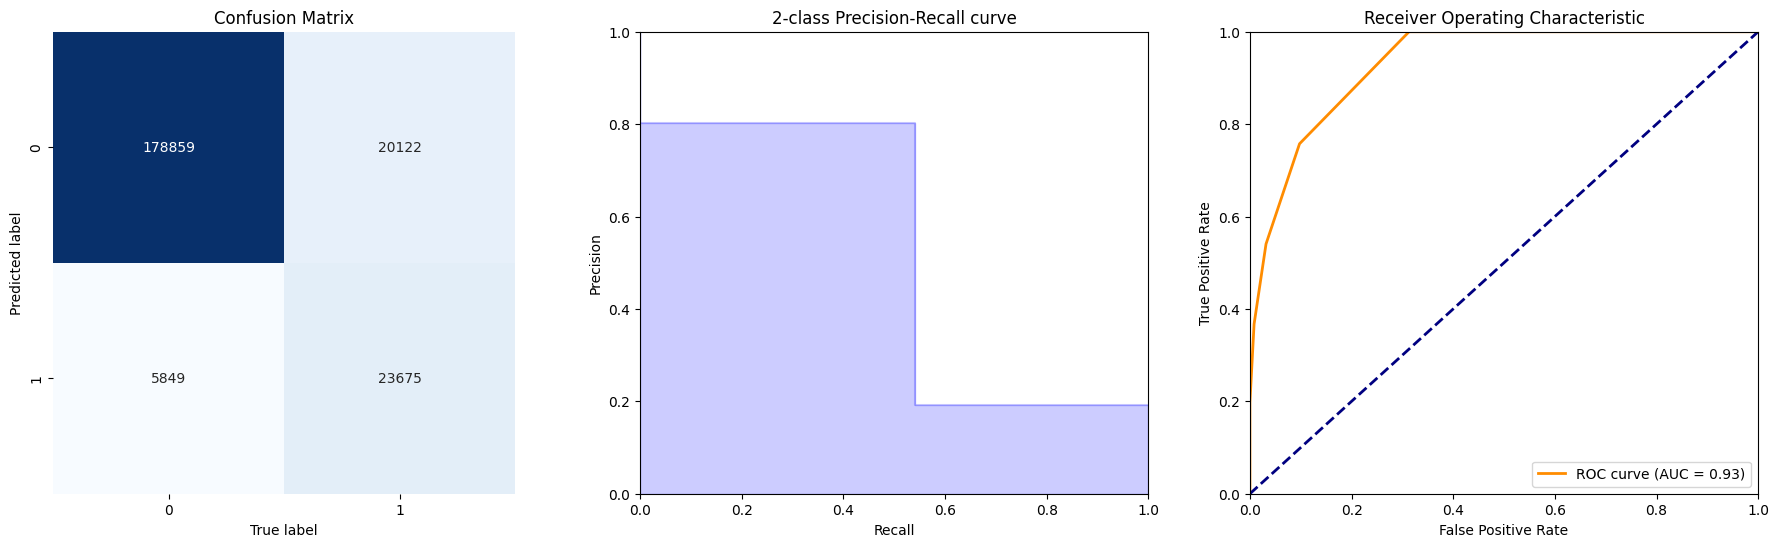


*****************
* Random Forest *
*****************
Accuracy : 0.9973 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9964 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9895 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


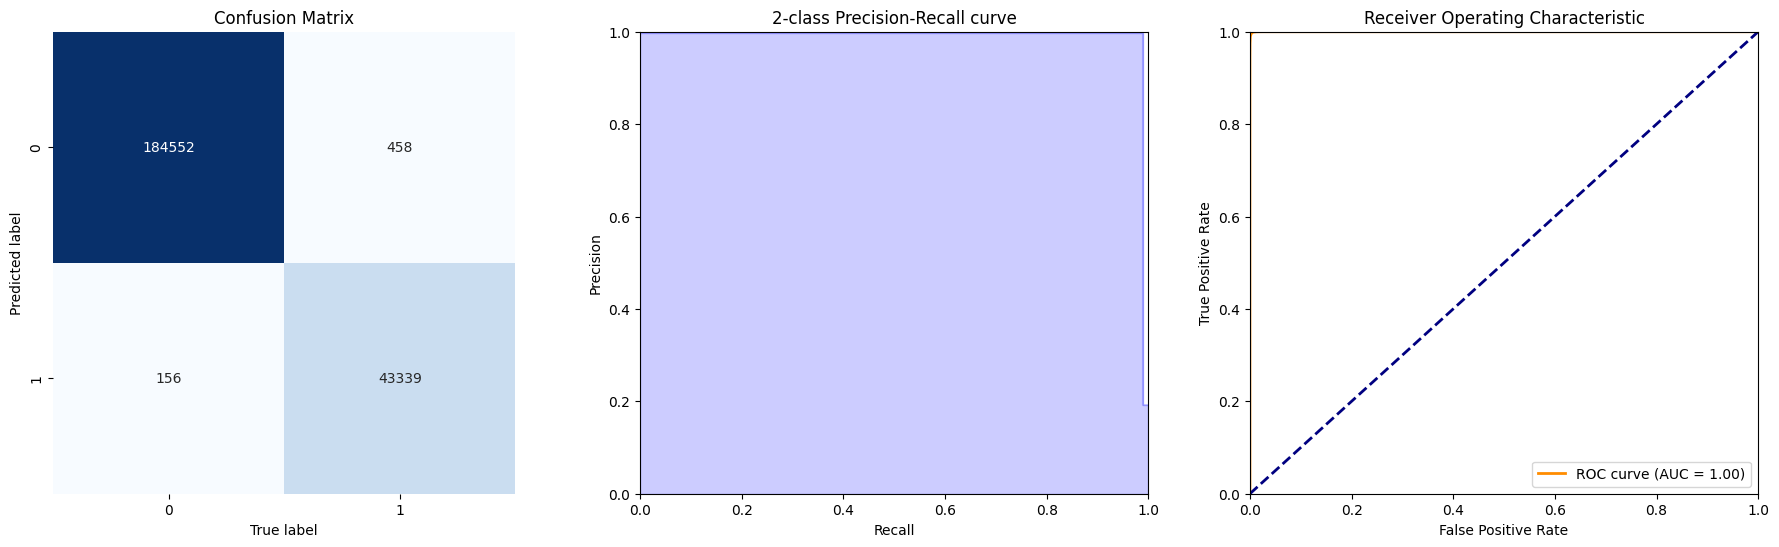


*****************
* Decision Tree *
*****************
Accuracy : 0.9999 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9995 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


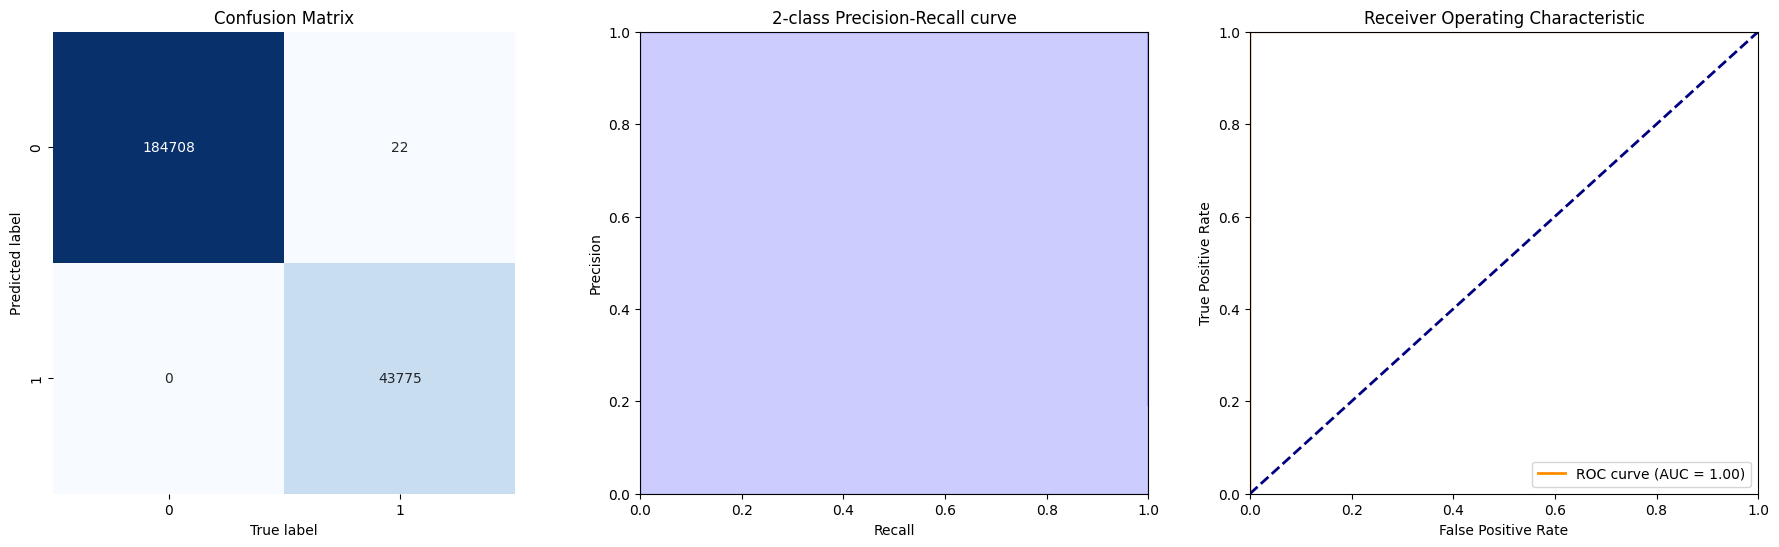


***********************
* Logistic Regression *
***********************
Accuracy : 0.9045 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9002 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5645 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9755                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


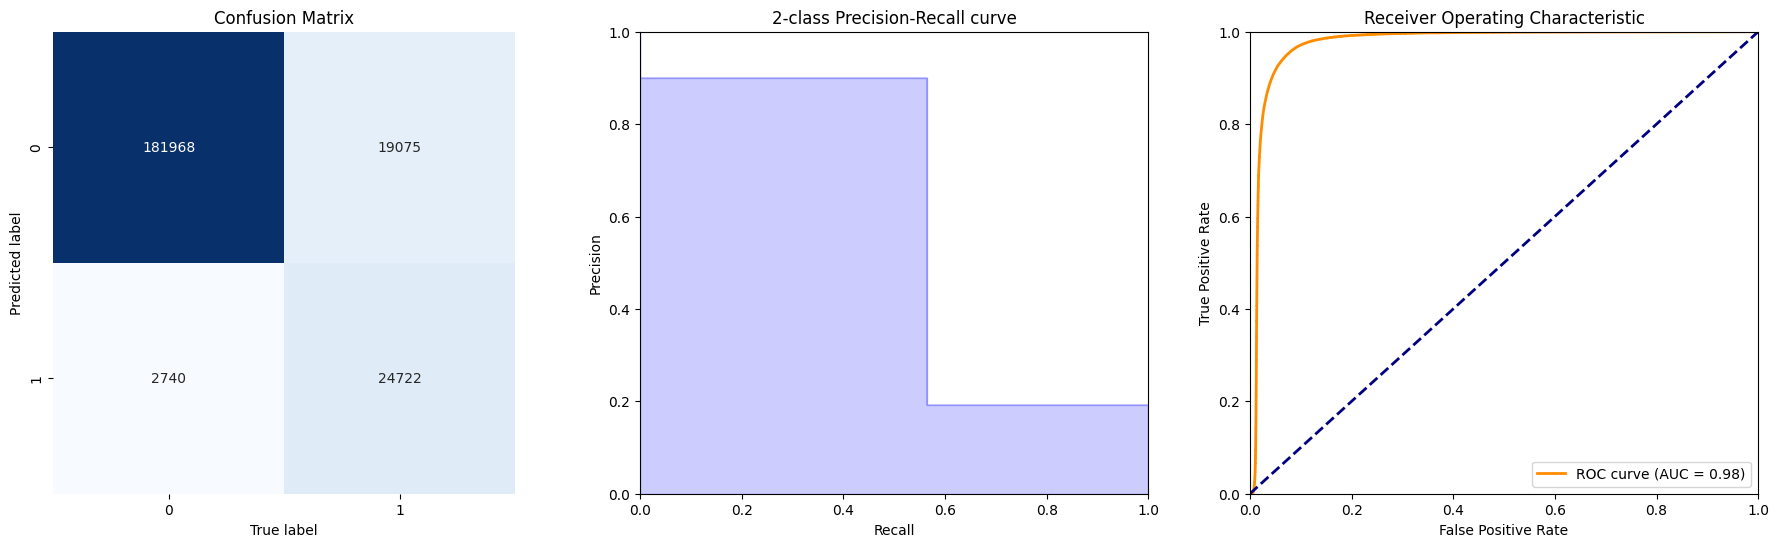


************
* Stacking *
************
Accuracy : 0.9999 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9995 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


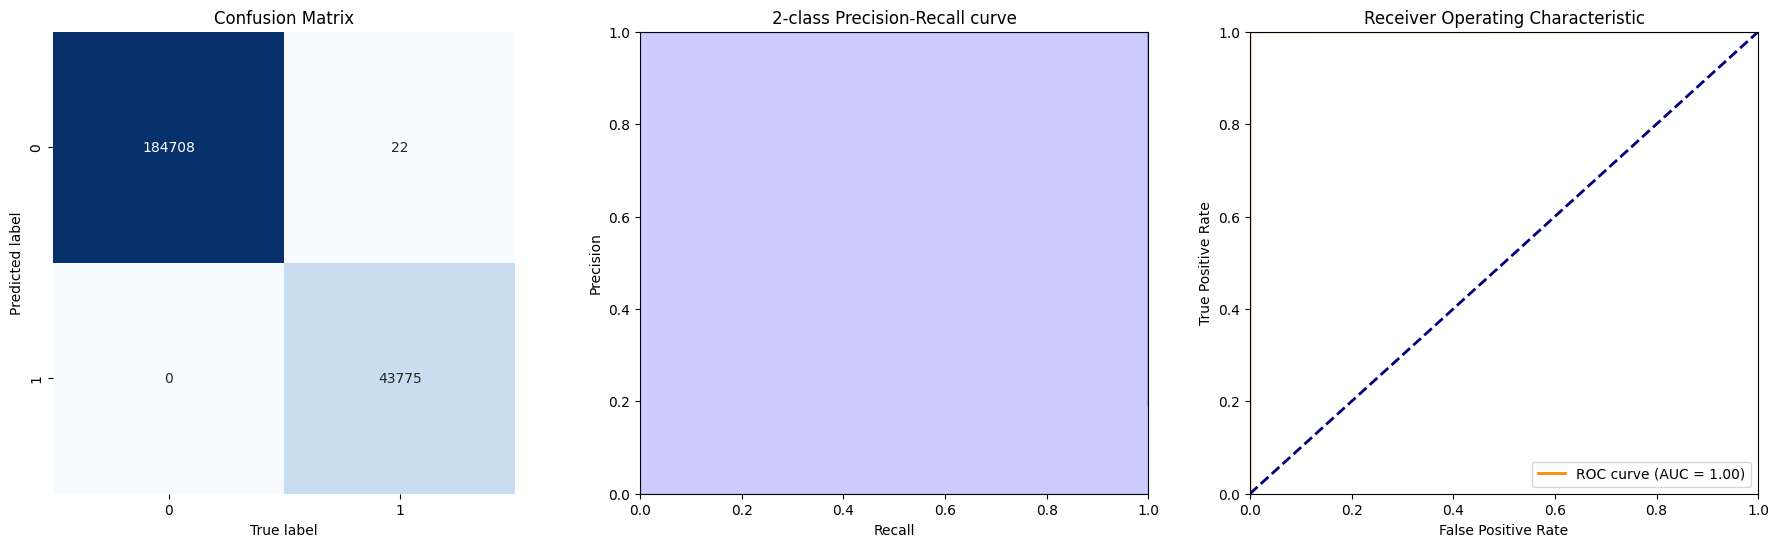

In [78]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['K-NN', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'Stacking']
for i, m in enumerate([clf1, clf2, clf3, lr, sclf]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict_proba(X_train)[:,1]
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

In [79]:
results

Model  Accuracy  Precision    Recall   ROC_AUC
0                 K-NN  0.886344   0.801890  0.540562  0.932024
1        Random Forest  0.997313   0.996413  0.989543  0.999954
2        Decision Tree  0.999904   1.000000  0.999498  1.000000
3  Logistic Regression  0.904532   0.900226  0.564468  0.975536
4             Stacking  0.999904   1.000000  0.999498  0.999951

In [80]:
#Make predictions and evaluate the test model
predictions = sclf.predict(X_test)
probabilities = sclf.predict_proba(X_test)[:,1]

Accuracy : 0.9565 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8869 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8861 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9653                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


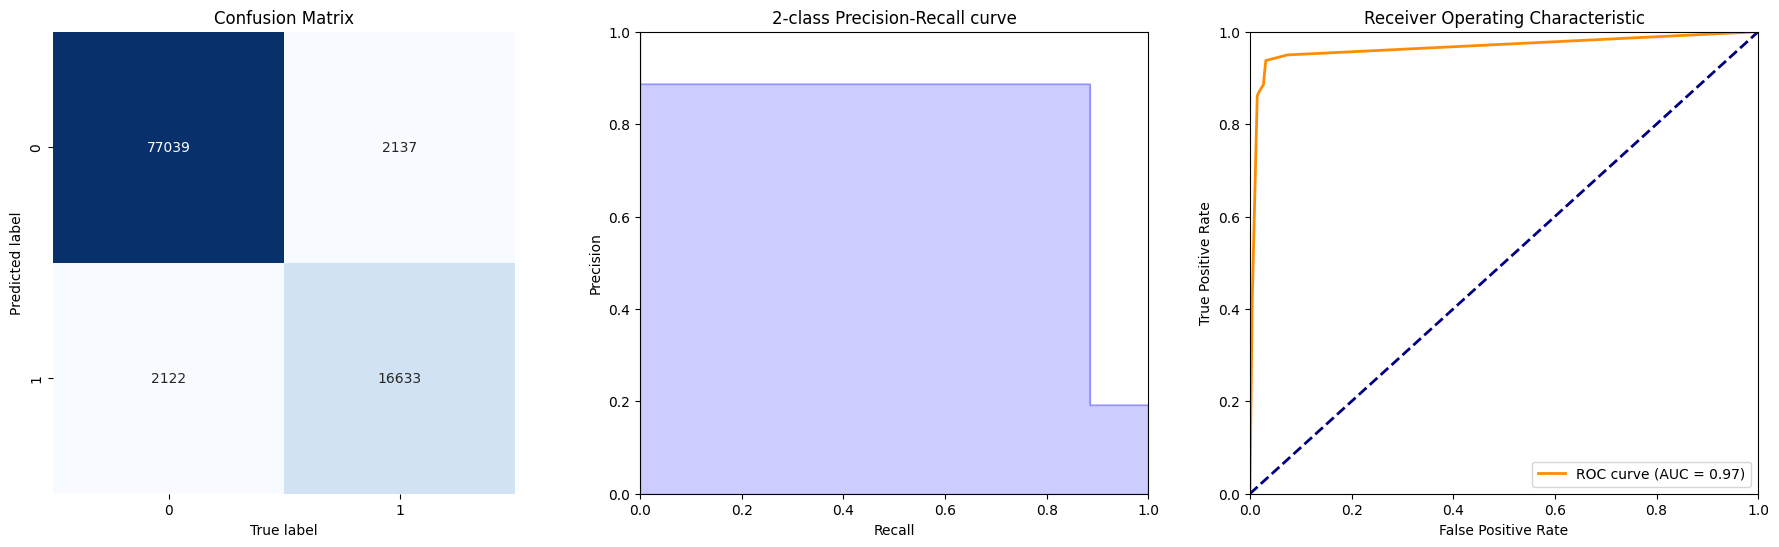

In [81]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, probabilities)
# keep the results
results.loc[len(results)] = {
    'Model': 'Stacking (with test)', 
    'Accuracy': accuracy_, 
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print()

In [82]:
results

Model  Accuracy  Precision    Recall   ROC_AUC
0                  K-NN  0.886344   0.801890  0.540562  0.932024
1         Random Forest  0.997313   0.996413  0.989543  0.999954
2         Decision Tree  0.999904   1.000000  0.999498  1.000000
3   Logistic Regression  0.904532   0.900226  0.564468  0.975536
4              Stacking  0.999904   1.000000  0.999498  0.999951
5  Stacking (with test)  0.956510   0.886857  0.886148  0.965277

as per Amins advice I ran this model 5 randomly selected - the results were all very similar with an average of ...

<p style="font-family: Arial; font-size:1.4em;color:green;"> Neural Network </p>

In [83]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [84]:
mwd.head()

HOLE_ID Drill_ID      Start_Time        End_Time  End_Depth_(m)    RPM  \
0     EA1       M1  1/03/2019 1:37  1/03/2019 1:37            0.1  143.9   
1     EA1       M1  1/03/2019 1:37  1/03/2019 1:37            0.2  143.3   
2     EA1       M1  1/03/2019 1:37  1/03/2019 1:37            0.3  143.7   
3     EA1       M1  1/03/2019 1:37  1/03/2019 1:37            0.4  144.0   
4     EA1       M1  1/03/2019 1:38  1/03/2019 1:37            0.5  143.3   

   WOB_(kN)  Torque_(kN-m)  ROP_(m/s)  Coal/Not_Coal  
0    106.31            2.5     0.0094              0  
1    106.55            2.6     0.0686              0  
2    110.85            3.4     0.0655              0  
3    112.90            3.6     0.0717              1  
4    113.54            3.6     0.0617              1

In [85]:
mwd['Coal/Not_Coal'].value_counts()

0    263869
1     62567
Name: Coal/Not_Coal, dtype: int64

In [86]:
# create X and y to match Scikit-Learn parlance

features = ['WOB_(kN)', 'ROP_(m/s)', 'RPM','Torque_(kN-m)' ]
outcome = 'Coal/Not_Coal'

X = mwd[features].copy()
y=mwd[outcome]

In [87]:
print(X.shape, y.shape)

(326436, 4) (326436,)


In [88]:
print(len(X),len(y))

326436 326436


In [89]:
tf.random.set_seed(42)

Neural Network Model 1

In [90]:
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [91]:
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy())

In [92]:
optimizer = tf.keras.optimizers.SGD()
#SGD means Stochastic Gradient Descent

In [93]:
metrics = ['accuracy']

In [94]:
model_1.fit(X, y, epochs = 5)

Epoch 1/5
10202/10202 [==============================] - 7s 644us/step - loss: 12.3447
Epoch 2/5
10202/10202 [==============================] - 7s 707us/step - loss: 12.3405
Epoch 3/5
10202/10202 [==============================] - 7s 702us/step - loss: 12.3406
Epoch 4/5
10202/10202 [==============================] - 7s 696us/step - loss: 12.3386
Epoch 5/5
10202/10202 [==============================] - 7s 657us/step - loss: 12.3357


In [95]:
model_1.fit(X, y, epochs = 200, verbose = 0) 
#we set verbose = 0 to remove training procedure )
model_1.evaluate(X, y)

10202/10202 [==============================] - 6s 615us/step - loss: 12.3227


12.322701454162598

Neural Network Model 2

In [96]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.Input(shape=(4,)))
model_2.add(tf.keras.layers.Dense(8))

In [97]:
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy())

In [98]:
optimizer = tf.keras.optimizers.SGD()

In [99]:
metrics = ['accuracy']

In [100]:
model_2.fit(X, y, epochs = 5)

Epoch 1/5
10202/10202 [==============================] - 9s 850us/step - loss: 9.0305
Epoch 2/5
10202/10202 [==============================] - 9s 875us/step - loss: 8.8131
Epoch 3/5
10202/10202 [==============================] - 10s 952us/step - loss: 8.8129
Epoch 4/5
10202/10202 [==============================] - 9s 875us/step - loss: 8.8125
Epoch 5/5
10202/10202 [==============================] - 10s 991us/step - loss: 8.8105


In [101]:
model_2.fit(X, y, epochs = 200, verbose = 0) 
#we set verbose = 0 to remove training procedure )
model_2.evaluate(X, y)

10202/10202 [==============================] - 8s 747us/step - loss: 6.9842


6.984157085418701

Neural Network Model 3

Try with a different optimiser

In [102]:
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.Input(shape=(4,)))
model_3.add(tf.keras.layers.Dense(8))

In [103]:
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy())

In [104]:
optimizer = tf.keras.optimizers.Adamax()

In [105]:
metrics = ['accuracy']

In [106]:
model_3.fit(X, y, epochs = 5)

Epoch 1/5
10202/10202 [==============================] - 9s 844us/step - loss: 6.4775
Epoch 2/5
10202/10202 [==============================] - 9s 837us/step - loss: 6.4744
Epoch 3/5
10202/10202 [==============================] - 9s 872us/step - loss: 6.4731
Epoch 4/5
10202/10202 [==============================] - 8s 797us/step - loss: 6.4730
Epoch 5/5
10202/10202 [==============================] - 9s 850us/step - loss: 6.4728


In [107]:
model_3.fit(X, y, epochs = 200, verbose = 0) 
#we set verbose = 0 to remove training procedure )
model_3.evaluate(X, y)

10202/10202 [==============================] - 10s 937us/step - loss: 6.4702


6.470207214355469

Neural Network Model 4

Try with more batches

In [108]:
model_4 = tf.keras.Sequential()
model_4.add(tf.keras.Input(shape=(4,)))
model_4.add(tf.keras.layers.Dense(12))

In [109]:
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy())

In [110]:
optimizer = tf.keras.optimizers.SGD()

In [111]:
metrics = ['accuracy']

In [112]:
model_4.fit(X, y, batch_size=64, epochs = 5)

Epoch 1/5
5101/5101 [==============================] - 7s 1ms/step - loss: 8.1758
Epoch 2/5
5101/5101 [==============================] - 7s 1ms/step - loss: 7.6365
Epoch 3/5
5101/5101 [==============================] - 6s 1ms/step - loss: 7.6367
Epoch 4/5
5101/5101 [==============================] - 6s 1ms/step - loss: 7.6375
Epoch 5/5
5101/5101 [==============================] - 6s 1ms/step - loss: 7.6343


In [113]:
model_4.fit(X, y, epochs = 200, verbose = 0) 
#we set verbose = 0 to remove training procedure )
model_4.evaluate(X, y)

10202/10202 [==============================] - 9s 886us/step - loss: 6.4155


6.415513515472412

Neural Network Model 5

try a different optimiser

In [114]:
model_5 = tf.keras.Sequential()
model_5.add(tf.keras.Input(shape=(4,)))
model_5.add(tf.keras.layers.Dense(8))

In [115]:
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy())

In [116]:
optimizer = tf.keras.optimizers.Adagrad()

In [117]:
metrics = ['accuracy']

In [118]:
model_5.fit(X, y, epochs = 5)

Epoch 1/5
10202/10202 [==============================] - 12s 1ms/step - loss: 6.4612
Epoch 2/5
10202/10202 [==============================] - 9s 898us/step - loss: 6.4584
Epoch 3/5
10202/10202 [==============================] - 9s 872us/step - loss: 6.4592
Epoch 4/5
10202/10202 [==============================] - 8s 811us/step - loss: 6.4563
Epoch 5/5
10202/10202 [==============================] - 9s 914us/step - loss: 6.4560


In [119]:
model_5.fit(X, y, epochs = 200, verbose = 0) 
#we set verbose = 0 to remove training procedure )
model_5.evaluate(X, y)

10202/10202 [==============================] - 8s 779us/step - loss: 5.8006


5.800573825836182

Neural Network Model 6

Try adding regulisers 

In [120]:
model_6 = tf.keras.Sequential()
model_6.add(tf.keras.Input(shape=(4,)))
model_6.add(tf.keras.layers.Dense(8))


In [122]:
regularizer = tf.keras.regularizers.L2(2.)
tensor = tf.ones(shape=(5, 5))


In [123]:
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy())

In [124]:
optimizer = tf.keras.optimizers.SGD()

In [125]:
metrics = ['accuracy']

In [126]:
model_6.fit(X, y, epochs = 5, batch_size=32)

Epoch 1/5
10202/10202 [==============================] - 10s 957us/step - loss: 6.4779
Epoch 2/5
10202/10202 [==============================] - 10s 982us/step - loss: 6.4751
Epoch 3/5
10202/10202 [==============================] - 13s 1ms/step - loss: 6.4751
Epoch 4/5
10202/10202 [==============================] - 10s 981us/step - loss: 6.4755
Epoch 5/5
10202/10202 [==============================] - 9s 916us/step - loss: 6.4751


In [127]:
model_6.fit(X, y, epochs = 200, verbose = 0) 
#we set verbose = 0 to remove training procedure )
model_6.evaluate(X, y)

10202/10202 [==============================] - 7s 722us/step - loss: 6.4719


6.471947193145752

<p style="font-family: Arial; font-size:1.4em;color:green;"> Stacking Model with a balanced data set </p>

In [128]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 184708, 1: 184708})
Testing target statistics: Counter({0: 79161, 1: 18770})


In [129]:
np.random.seed(0)

# create the sub models
clf1 = KNeighborsClassifier(n_neighbors = 5)
clf1.fit(X_res, y_res)
clf2 = RandomForestClassifier(n_estimators = 10, random_state = 1)
clf2.fit(X_res, y_res)
clf3 = DecisionTreeClassifier()
clf3.fit(X_res, y_res)
lr = LogisticRegression(multi_class = 'auto', solver = 'newton-cg')
lr.fit(X_res, y_res)

# create the ensemble model
sclf = StackingClassifier(
    classifiers = [clf1, clf2, clf3],
    meta_classifier = lr)
sclf.fit(X_res, y_res)
print()

In [130]:
kfold = model_selection.KFold(n_splits = 10)

results = model_selection.cross_val_score(sclf, X_res, y_res, cv = kfold)

print('Stacking, Cross-Validation mean: %.4f' % results.mean())

Stacking, Cross-Validation mean: 0.9854


In [131]:
#Verify and Evaluate the Training Model

def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(float)
        
    prediction_int = np.round(prediction)

    accuracy_ = accuracy_score(actual, prediction_int)
    precision_ = precision_score(actual, prediction_int)
    recall_ = recall_score(actual, prediction_int)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction_int)
    average_precision = average_precision_score(actual, prediction_int)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    return (accuracy_, precision_, recall_, roc_auc_)

********
* K-NN *
********
Accuracy : 0.9058 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8534 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9799 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9825                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


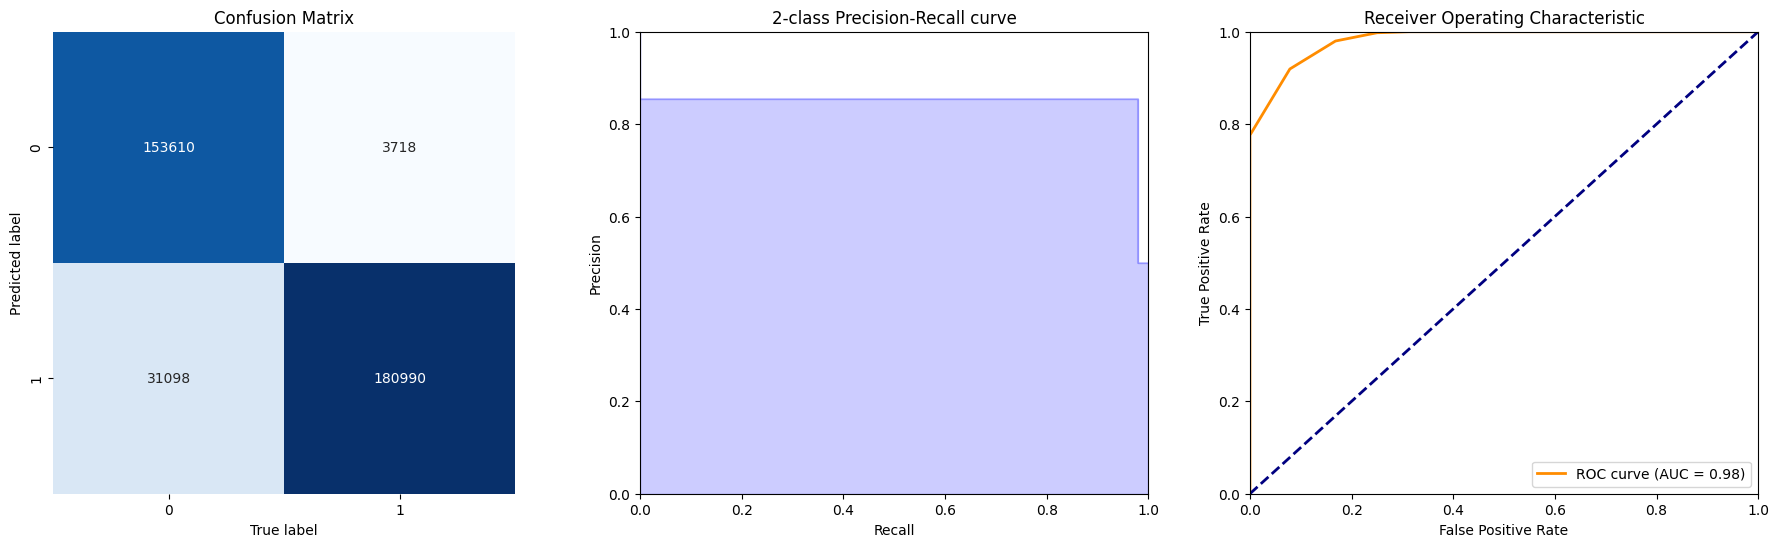


*****************
* Random Forest *
*****************
Accuracy : 0.9993 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9987 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9999 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


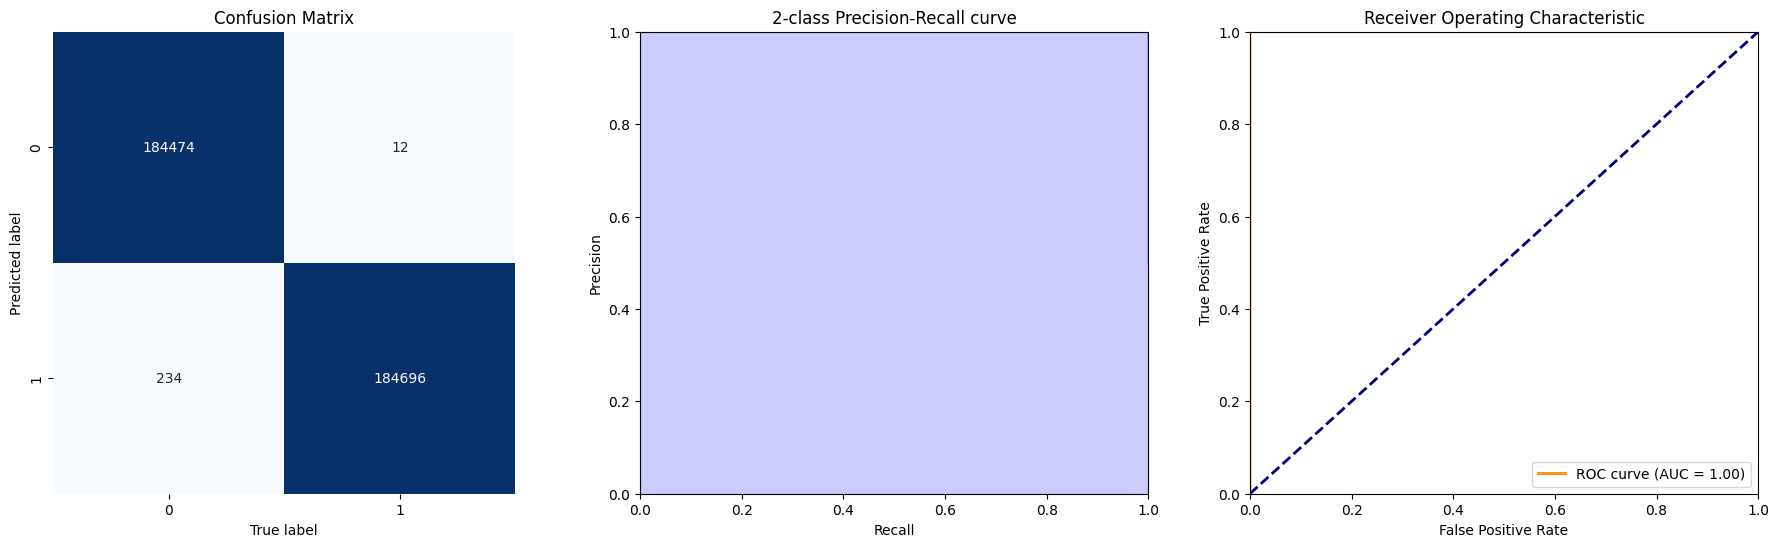


*****************
* Decision Tree *
*****************
Accuracy : 0.9999 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9999 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


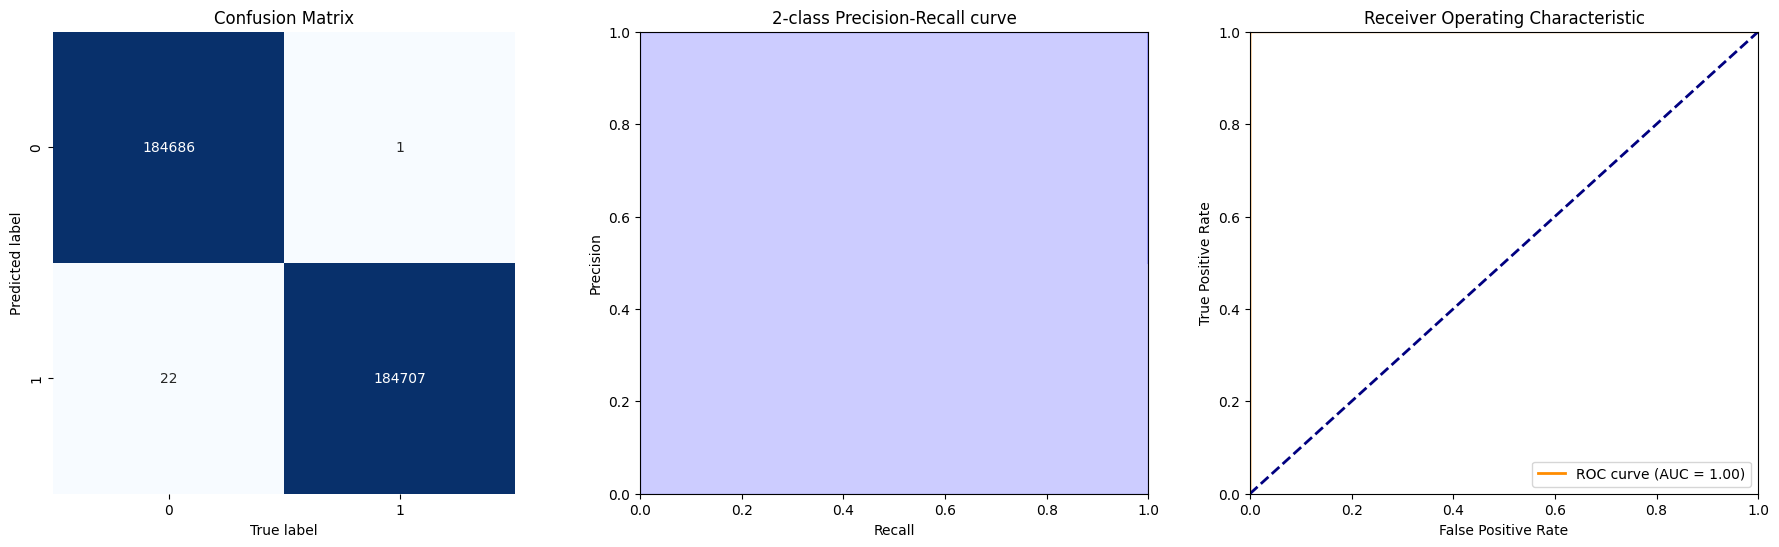


***********************
* Logistic Regression *
***********************
Accuracy : 0.9588 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9494 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9693 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9812                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


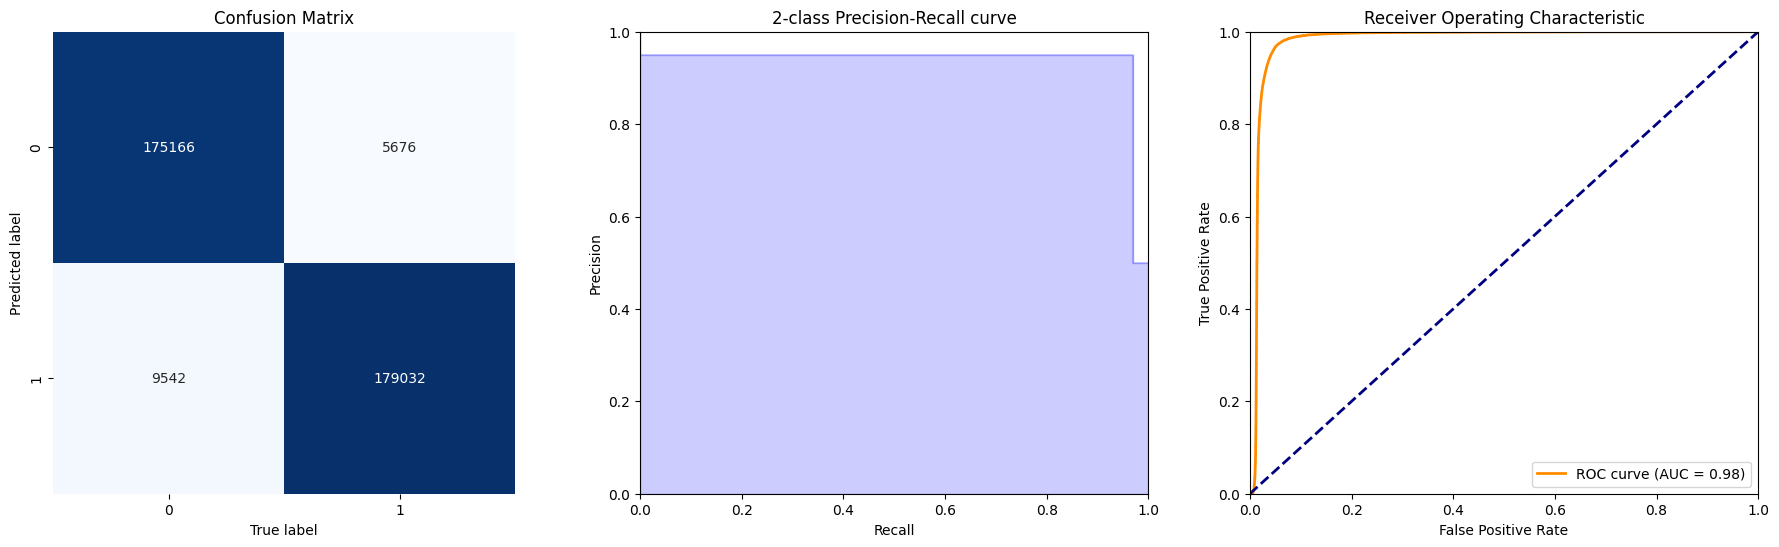


************
* Stacking *
************
Accuracy : 0.9999 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9999 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9999                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


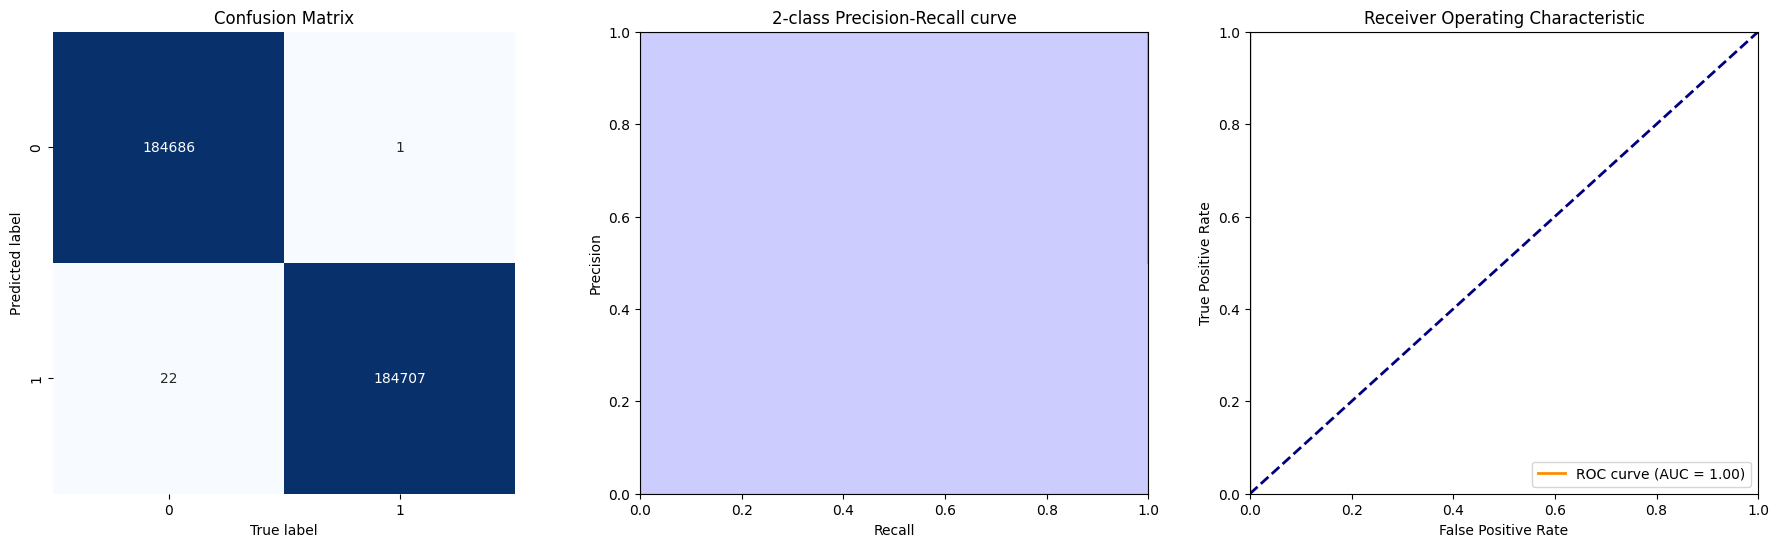

In [132]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['K-NN', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'Stacking']
for i, m in enumerate([clf1, clf2, clf3, lr, sclf]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict_proba(X_res)[:,1]
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_res, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

In [133]:
results

Model  Accuracy  Precision    Recall   ROC_AUC
0                 K-NN  0.905754   0.853372  0.979871  0.982524
1        Random Forest  0.999334   0.998735  0.999935  0.999999
2        Decision Tree  0.999938   0.999881  0.999995  1.000000
3  Logistic Regression  0.958805   0.949399  0.969270  0.981201
4             Stacking  0.999938   0.999881  0.999995  0.999939

In [134]:
#Make predictions and evaluate the test model
predictions = sclf.predict(X_test)
probabilities = sclf.predict_proba(X_test)[:,1]

Accuracy : 0.9563 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8864 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8857 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9705                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


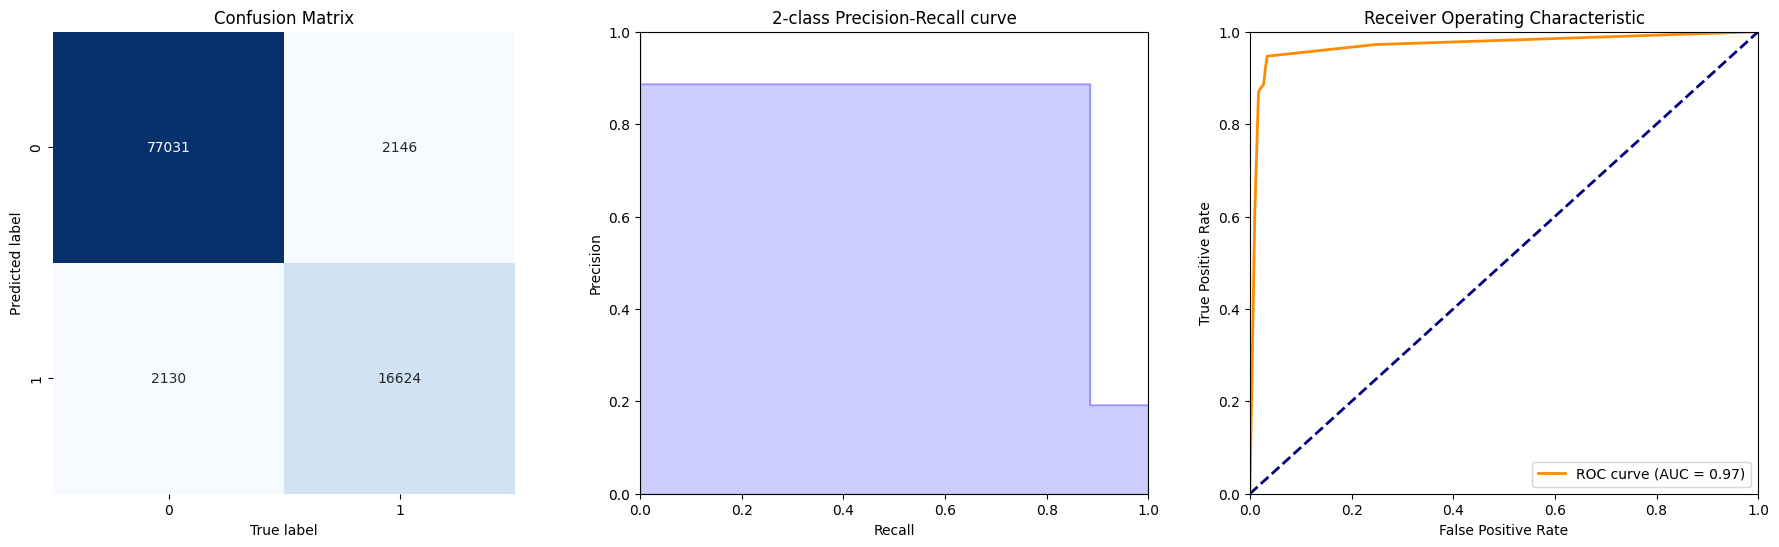

In [135]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, probabilities)
# keep the results
results.loc[len(results)] = {
    'Model': 'Stacking (with test)', 
    'Accuracy': accuracy_, 
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print()

In [136]:
results

Model  Accuracy  Precision    Recall   ROC_AUC
0                  K-NN  0.905754   0.853372  0.979871  0.982524
1         Random Forest  0.999334   0.998735  0.999935  0.999999
2         Decision Tree  0.999938   0.999881  0.999995  1.000000
3   Logistic Regression  0.958805   0.949399  0.969270  0.981201
4              Stacking  0.999938   0.999881  0.999995  0.999939
5  Stacking (with test)  0.956337   0.886424  0.885669  0.970543